## Let's visualize the heatmap results

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w435", "Trihydrochloride", "Blues"),
    pivot_value="pixel_mean",
    row_lookup={
        "A": "Full control",
        "B": "Perm. control",
        "C": "Triton 1%",
        "D": "Triton 2%",
        "E": "Triton 5%",
        "F": "Triton 10%",
        "G": "EtOH 70%",
        "H": "EtOH 100%",
    },
    column_lookup={
        "1_": "Full control",
        "2_": "Fix. control",
        "3_": "Form. 0.01%",
        "4_": "Form. 0.05%",
        "5_": "Form. 0.1%",
        "6_": "Form. 1%",
        "7_": "MetOH+Ace. 50%",
        "8_": "MetOH+Ace. 100%",
        "9_": "MetOH 50%",
        "10": "MetOH 100%",
        "11": "Acetone 50%",
        "12": "Acetone 100%",
    },
):
    df = pd.read_csv(experiment_results)
    df = df[df["filename"].str.contains(color_channel[0])]
    df["Permeabilization Agent"] = df["filename"].apply(lambda x: row_lookup[x[0]])
    df["Fixation Agent"] = df["filename"].apply(lambda x: column_lookup[x[1:3]])
    df = df.pivot(
        index="Permeabilization Agent", columns="Fixation Agent", values=pivot_value
    )
    df.index = pd.CategoricalIndex(df.index, categories= row_lookup.values())
    df.sort_index(level=0, inplace=True)
    df = df[column_lookup.values()]


    plt.figure(figsize=(12, 8))
    heatmap = sns.heatmap(
        df,
        cmap=color_channel[2],
    )
    heatmap.set_title(f"{color_channel[1]} heatmap of {experiment_results}")
    plt.show()

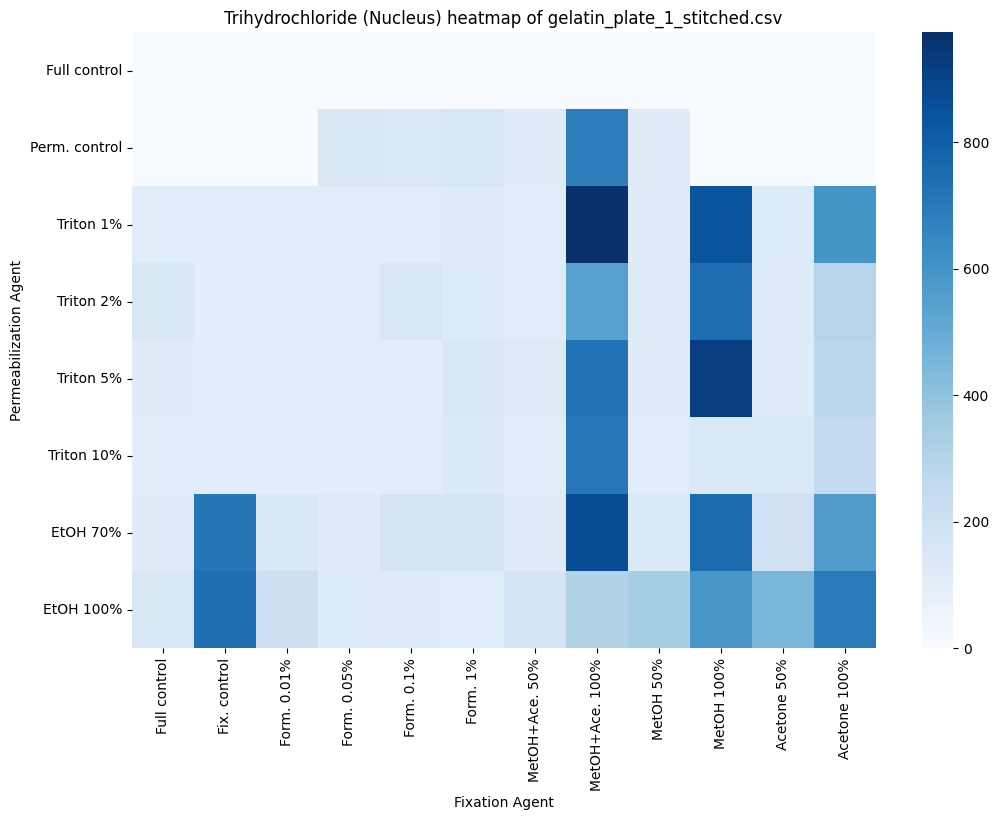

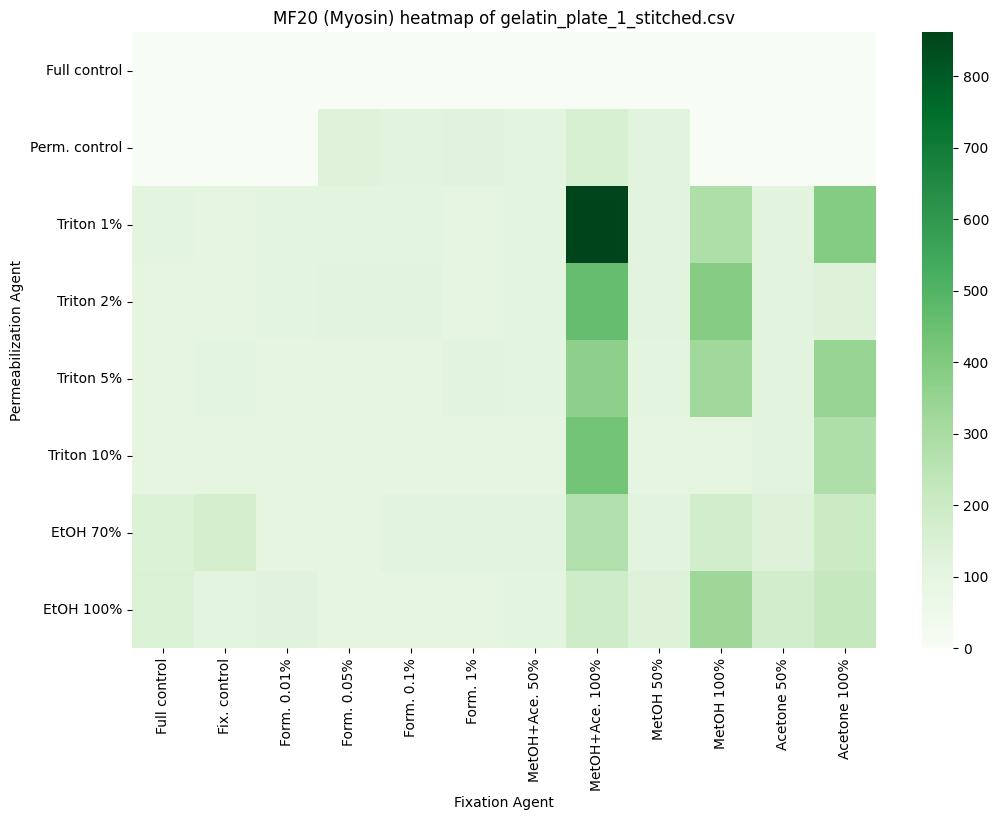

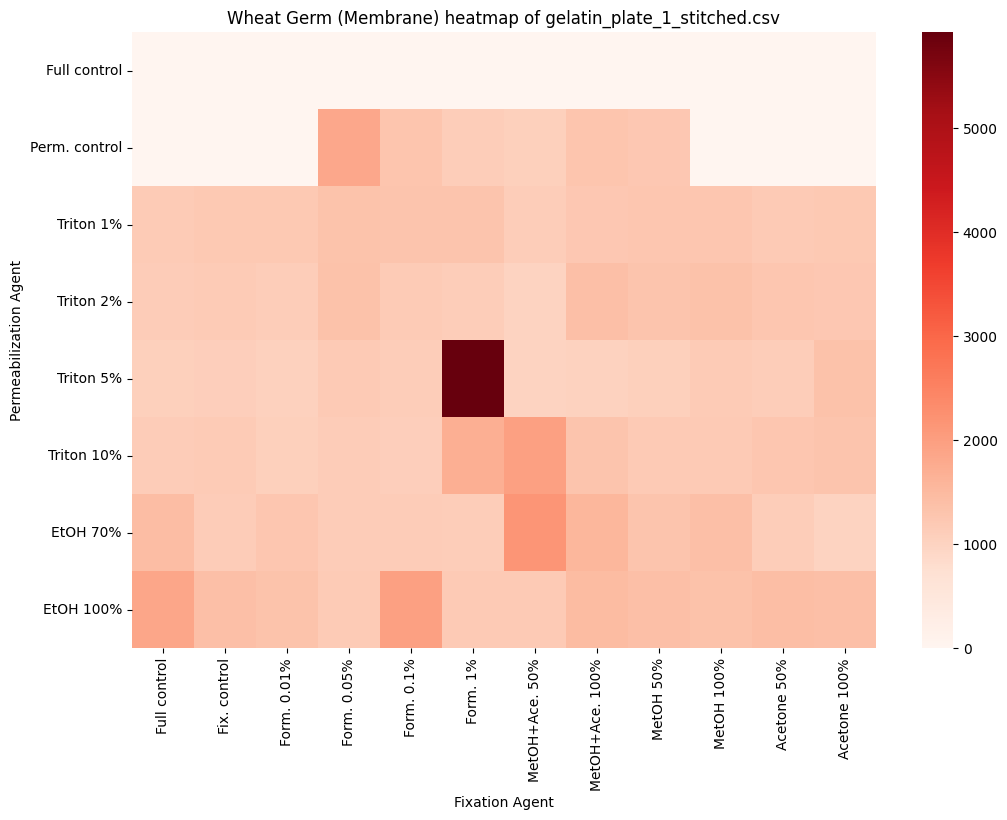

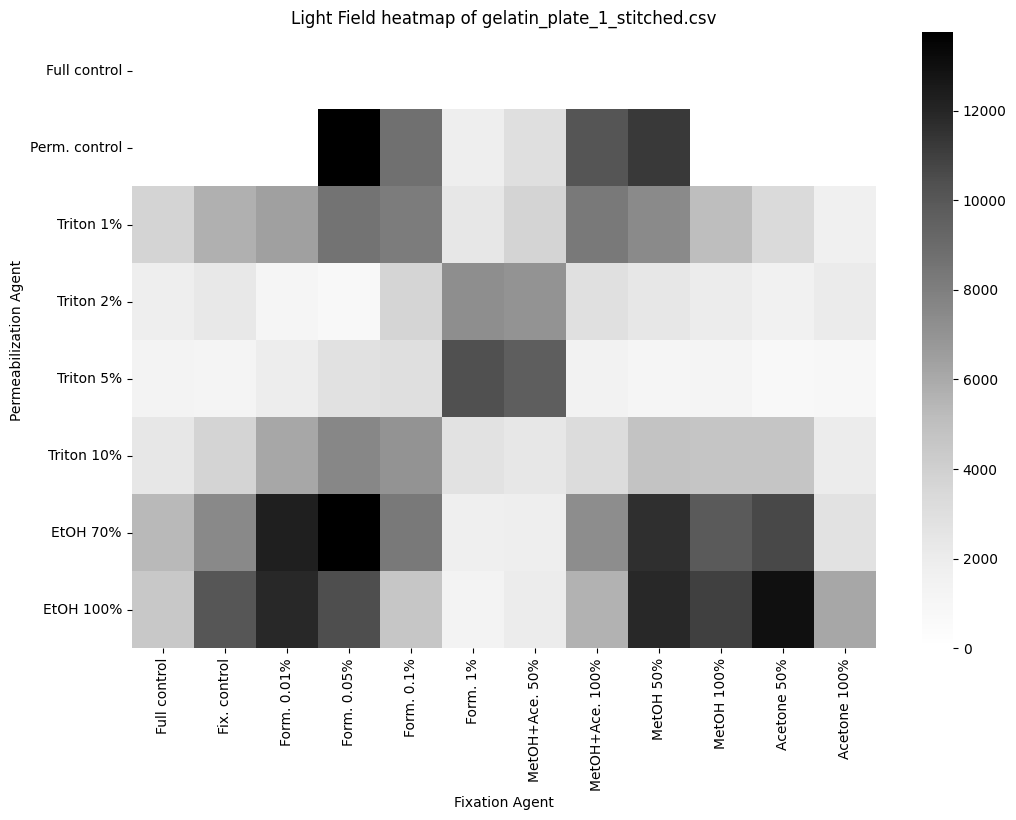

In [139]:
heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
)
heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w525", "MF20 (Myosin)", "Greens"),
)
heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w597", "Wheat Germ (Membrane)", "Reds"),
)

heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w-50", "Light Field", "Greys"),
)


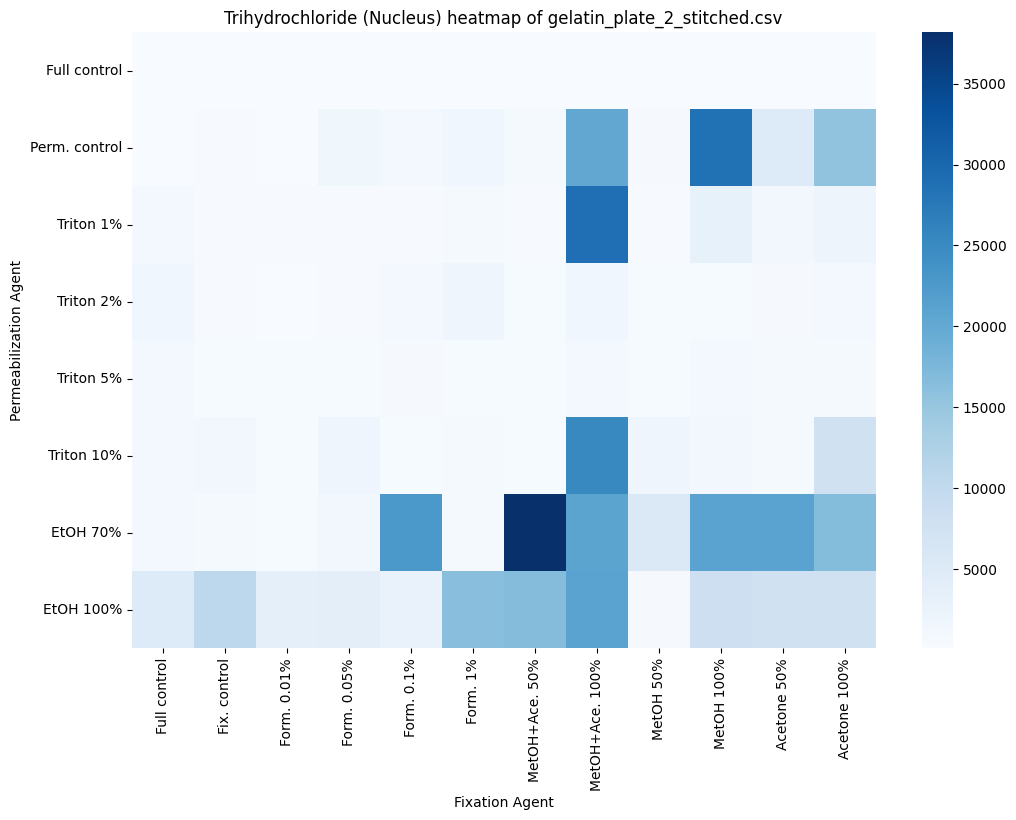

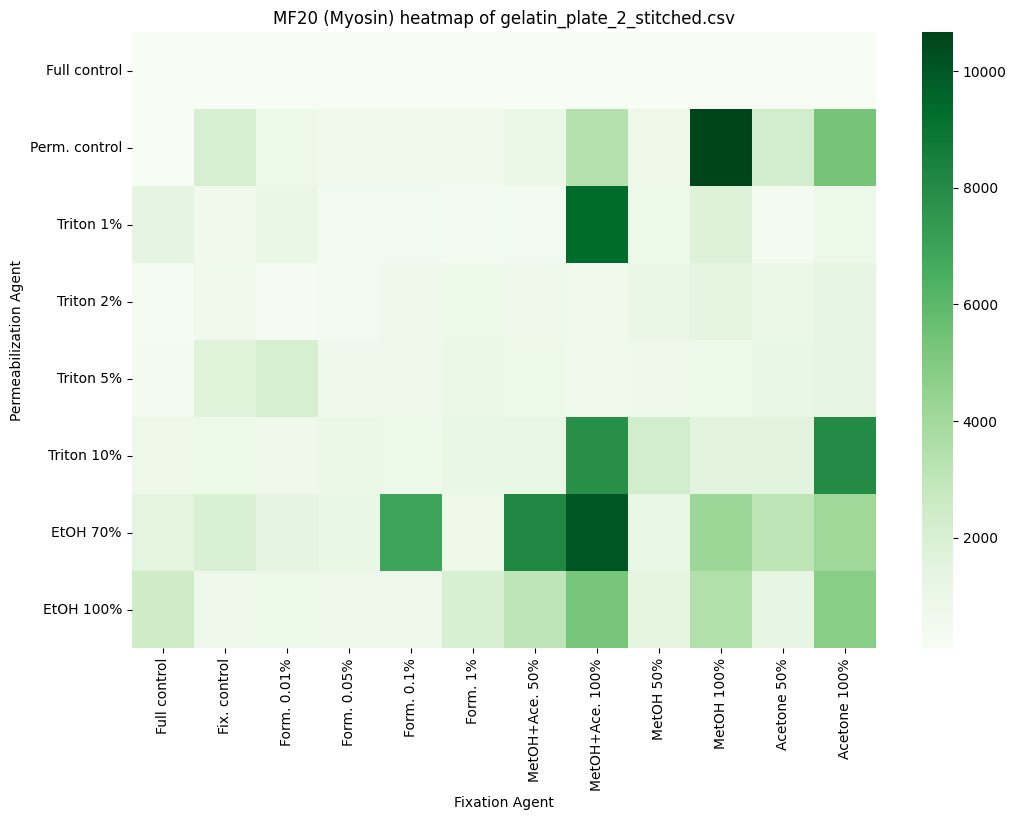

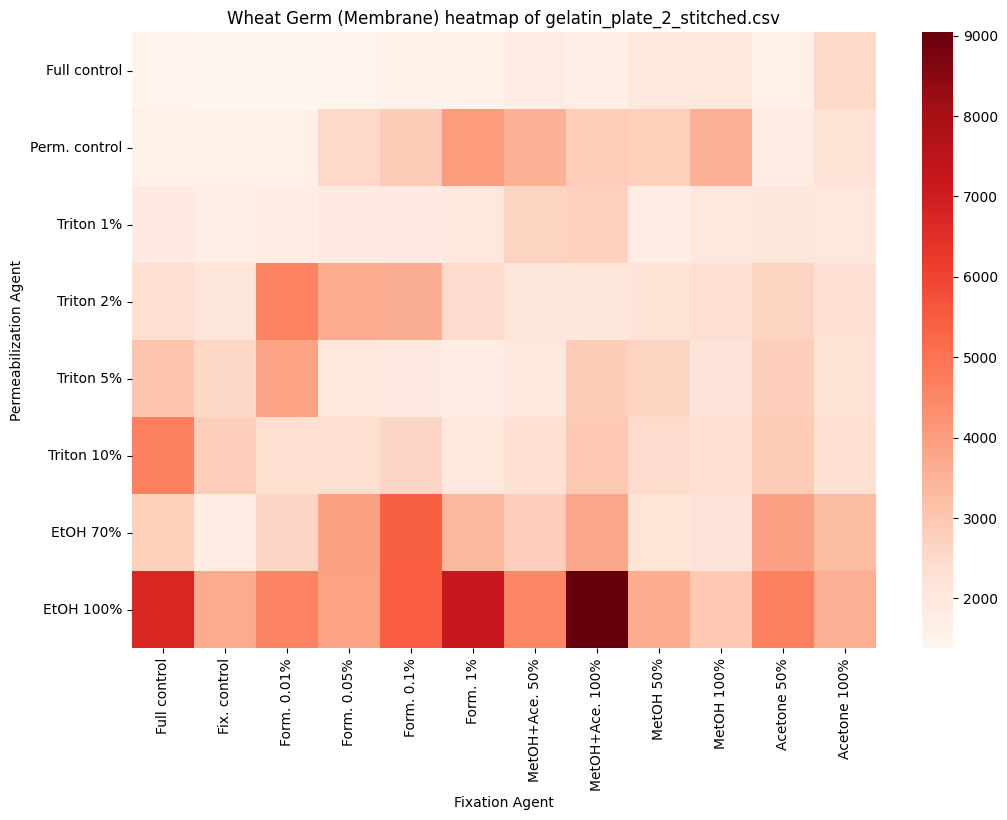

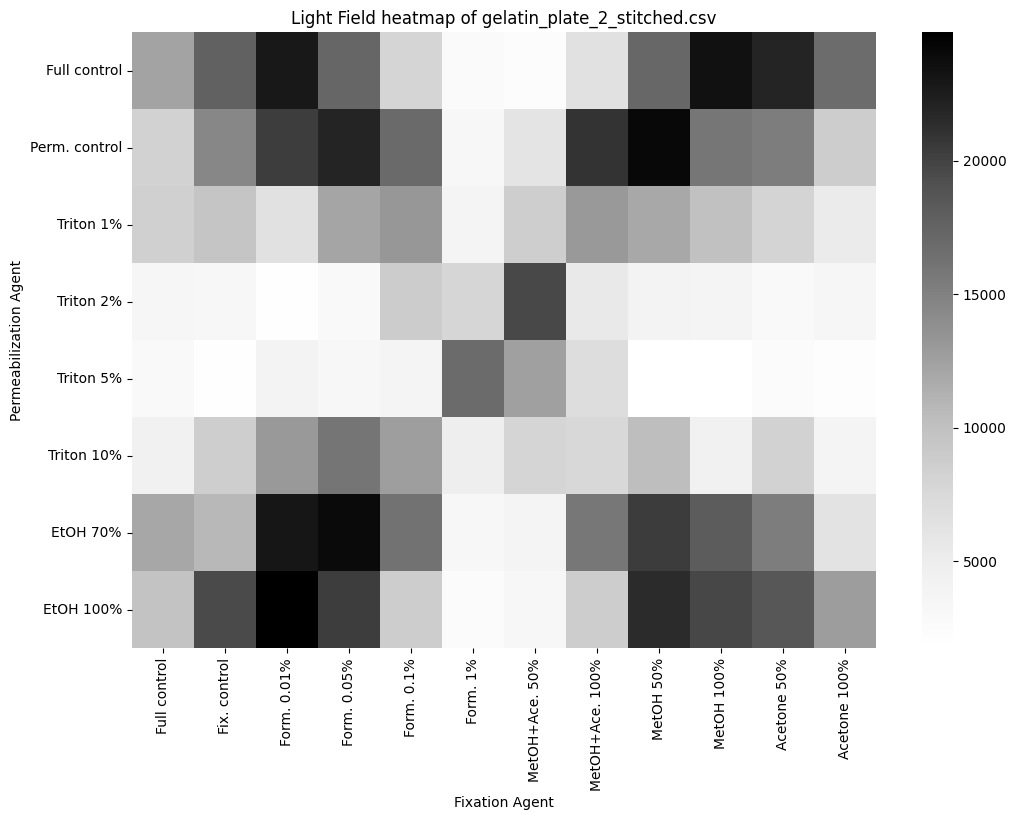

In [140]:
heatmap_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
)
heatmap_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w525", "MF20 (Myosin)", "Greens"),
)
heatmap_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w597", "Wheat Germ (Membrane)", "Reds"),
)

heatmap_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w-50", "Light Field", "Greys"),
)


# Can we viz the actual cells?

In [225]:
import numpy as np
from skimage import io
import pdb


def generate_image(filename, norm_factor=0.05, debug=False):
    # Normalize by a set value if norm_factor is set, otherwise normalize per cell
    norm = (
        lambda img: img * norm_factor
        if norm_factor is not None
        else img / (img.max() if img.max() > 0 else 1)
    )
    img = io.imread(filename)
    combined_img = np.zeros((img.shape[0], img.shape[1], 3))
    if "w435" in filename:
        combined_img[:, :, 2] = norm(img)
    elif "w525" in filename:
        combined_img[:, :, 1] = norm(img)
    elif "w597" in filename:
        combined_img[:, :, 0] = norm(img)
    elif "w-50" in filename:
        combined_img[:, :, 0] = img / (img.max() if img.max() > 0 else 1)
        combined_img[:, :, 1] = img / (img.max() if img.max() > 0 else 1)
        combined_img[:, :, 2] = img / (img.max() if img.max() > 0 else 1)

    if debug:
        plt.imshow(combined_img)
        plt.show()
    return combined_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


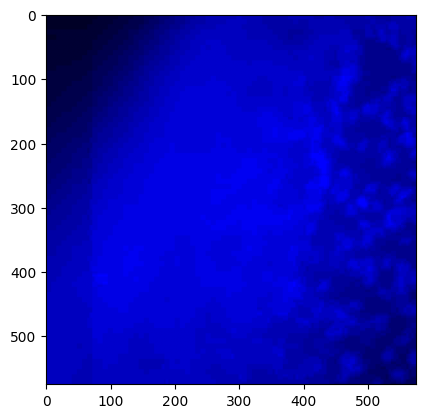

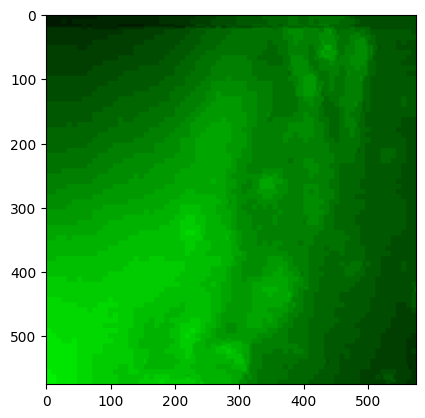

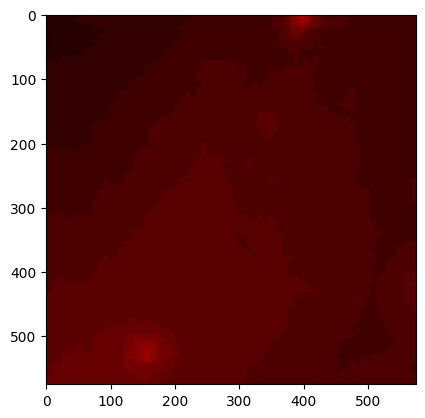

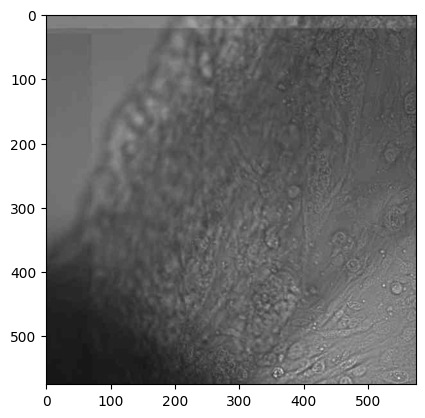

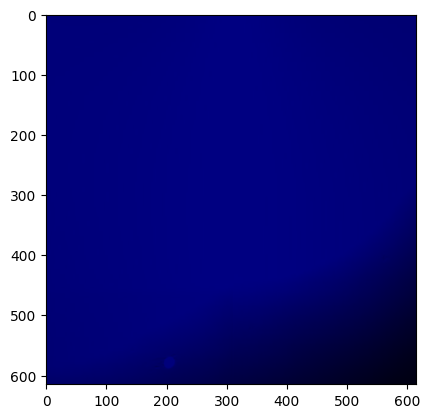

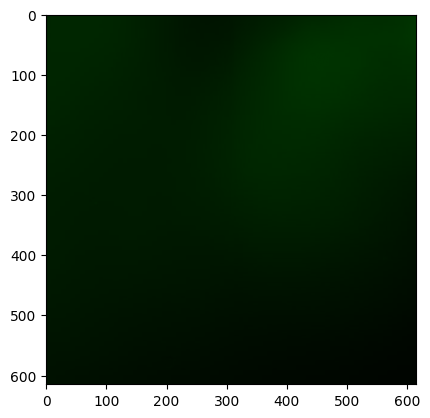

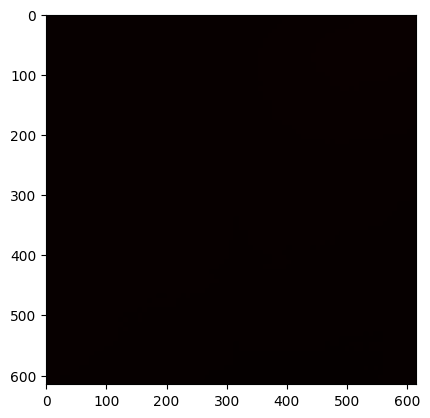

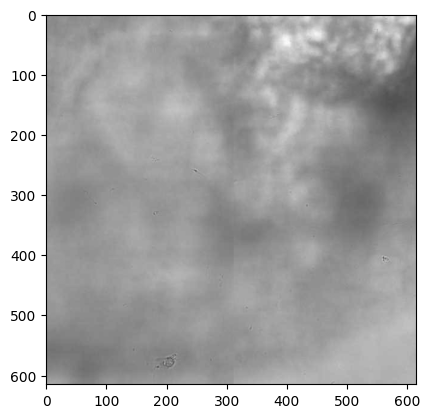

In [234]:
generate_image('gelatin_plate_1_stitched/C8_R3D_STC_w435_reduced.jpg', norm_factor=0.05, debug=True)
generate_image('gelatin_plate_1_stitched/C8_R3D_STC_w525_reduced.jpg', norm_factor=0.05, debug=True)
generate_image('gelatin_plate_1_stitched/C8_R3D_STC_w597_reduced.jpg', norm_factor=0.05, debug=True)
generate_image('gelatin_plate_1_stitched/C8_R3D_STC_w-50_reduced.jpg', norm_factor=0.05, debug=True)

generate_image('gelatin_plate_2_stitched/H10_R3D_STC_w435_reduced.jpg', norm_factor=0.002, debug=True)
generate_image('gelatin_plate_2_stitched/H10_R3D_STC_w525_reduced.jpg', norm_factor=0.002, debug=True)
generate_image('gelatin_plate_2_stitched/H10_R3D_STC_w597_reduced.jpg', norm_factor=0.002, debug=True)
generate_image('gelatin_plate_2_stitched/H10_R3D_STC_w-50_reduced.jpg', norm_factor=0.002, debug=True)
pass
pass

In [236]:
def image_matrix_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
    norm_factor=0.05,
    row_lookup={
        "A": "Full control",
        "B": "Perm. control",
        "C": "Triton 1%",
        "D": "Triton 2%",
        "E": "Triton 5%",
        "F": "Triton 10%",
        "G": "EtOH 70%",
        "H": "EtOH 100%",
    },
    column_lookup={
        "1_": "Full control",
        "2_": "Fix. control",
        "3_": "Form. 0.01%",
        "4_": "Form. 0.05%",
        "5_": "Form. 0.1%",
        "6_": "Form. 1%",
        "7_": "MetOH+Ace. 50%",
        "8_": "MetOH+Ace. 100%",
        "9_": "MetOH 50%",
        "10": "MetOH 100%",
        "11": "Acetone 50%",
        "12": "Acetone 100%",
    },
):
    df = pd.read_csv(experiment_results)
    df = df[df["filename"].str.contains(color_channel[0])]
    df["Permeabilization Agent"] = df["filename"].apply(lambda x: row_lookup[x[0]])
    df["Fixation Agent"] = df["filename"].apply(lambda x: column_lookup[x[1:3]])
    df = df.pivot(
        index="Permeabilization Agent",
        columns="Fixation Agent",
        values="reduced_filename",
    )
    df.index = pd.CategoricalIndex(df.index, categories=row_lookup.values())
    df.sort_index(level=0, inplace=True)
    df = df[column_lookup.values()]

    plt.figure(figsize=(12, 8))
    fig, axes = plt.subplots(
        nrows=df.shape[0],
        ncols=df.shape[1],
        figsize=(24, 16),
        sharex=True,
        sharey=True,
    )
    for row_idx in range(df.shape[0]):
        for col_idx in range(df.shape[1]):
            ax = axes[row_idx, col_idx]
            img = generate_image(df.iloc[row_idx, col_idx], norm_factor=norm_factor)
            ax.imshow(img)

    fig.suptitle(f"Snapshot of highest density cell cluster in {color_channel[1]} stain of {experiment_results}", fontsize=16)

    # Add y-labels
    for row_idx in range(df.shape[0]):
        ax = axes[row_idx, 0]
        ax.set_ylabel(
            list(row_lookup.values())[row_idx],
            fontsize=12,
            rotation=0,
            labelpad=20,
        )

    # Add x-labels
    for col_idx in range(df.shape[1]):
        ax = axes[0, col_idx]
        ax.set_ylabel(
            list(column_lookup.values())[col_idx], fontsize=12, rotation=0, labelpad=20
        )

    # Hide all axis labels & tick marks
    for ax_row in axes:
        for ax in ax_row:
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_xlabel("")
            ax.tick_params(axis="both", length=0)

    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    # plt.subplots_adjust(top=0.9, bottom=0.1, left=0.25, right=0.3, hspace=0.1, wspace=0.1)

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 1200x800 with 0 Axes>

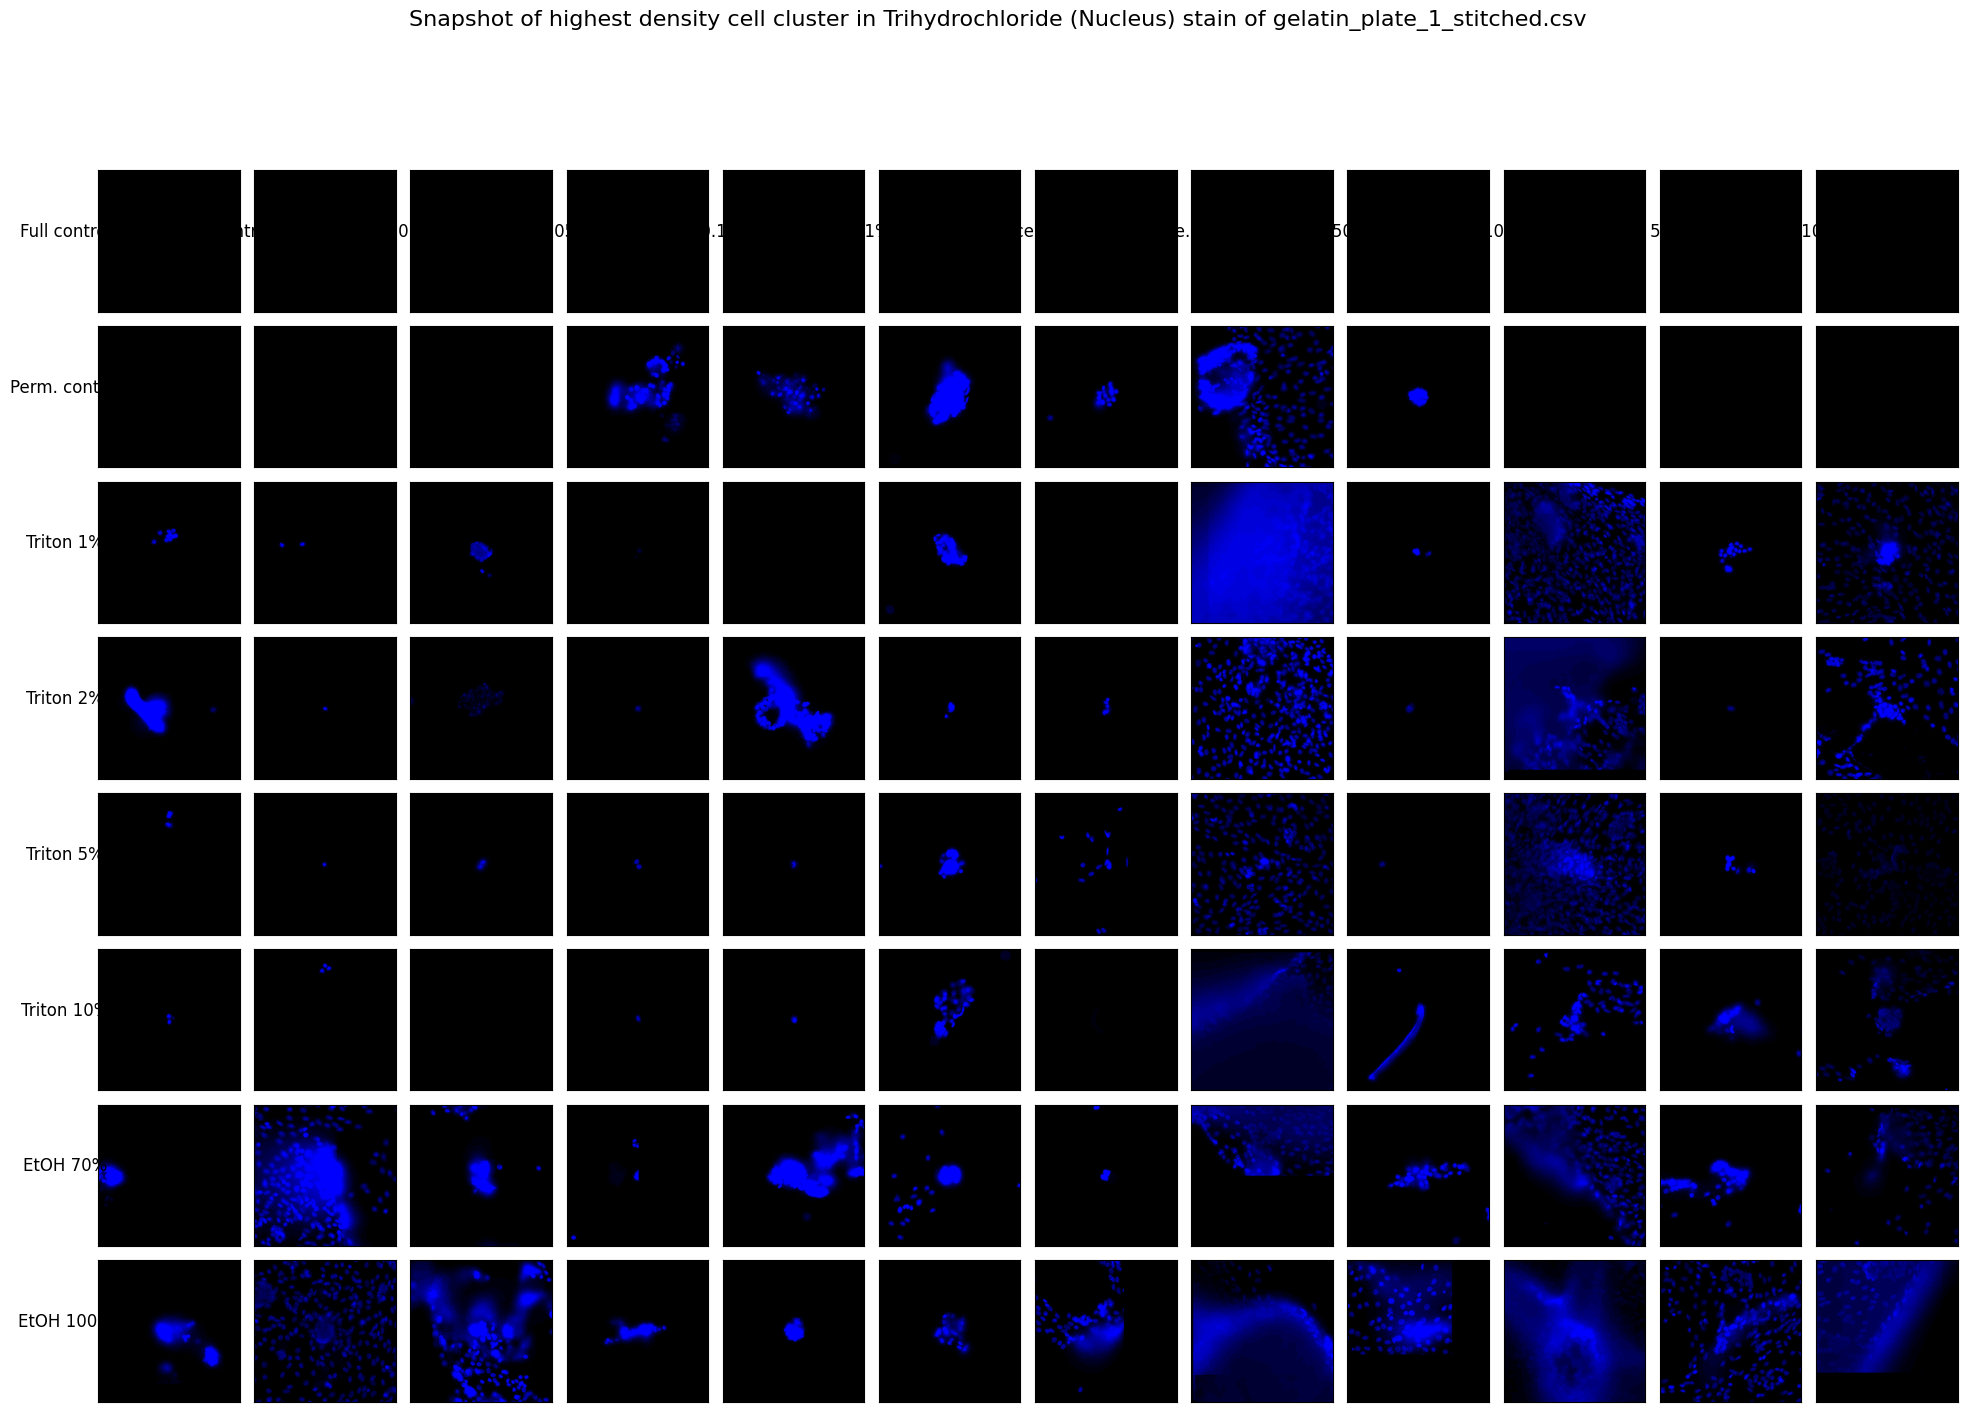

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 1200x800 with 0 Axes>

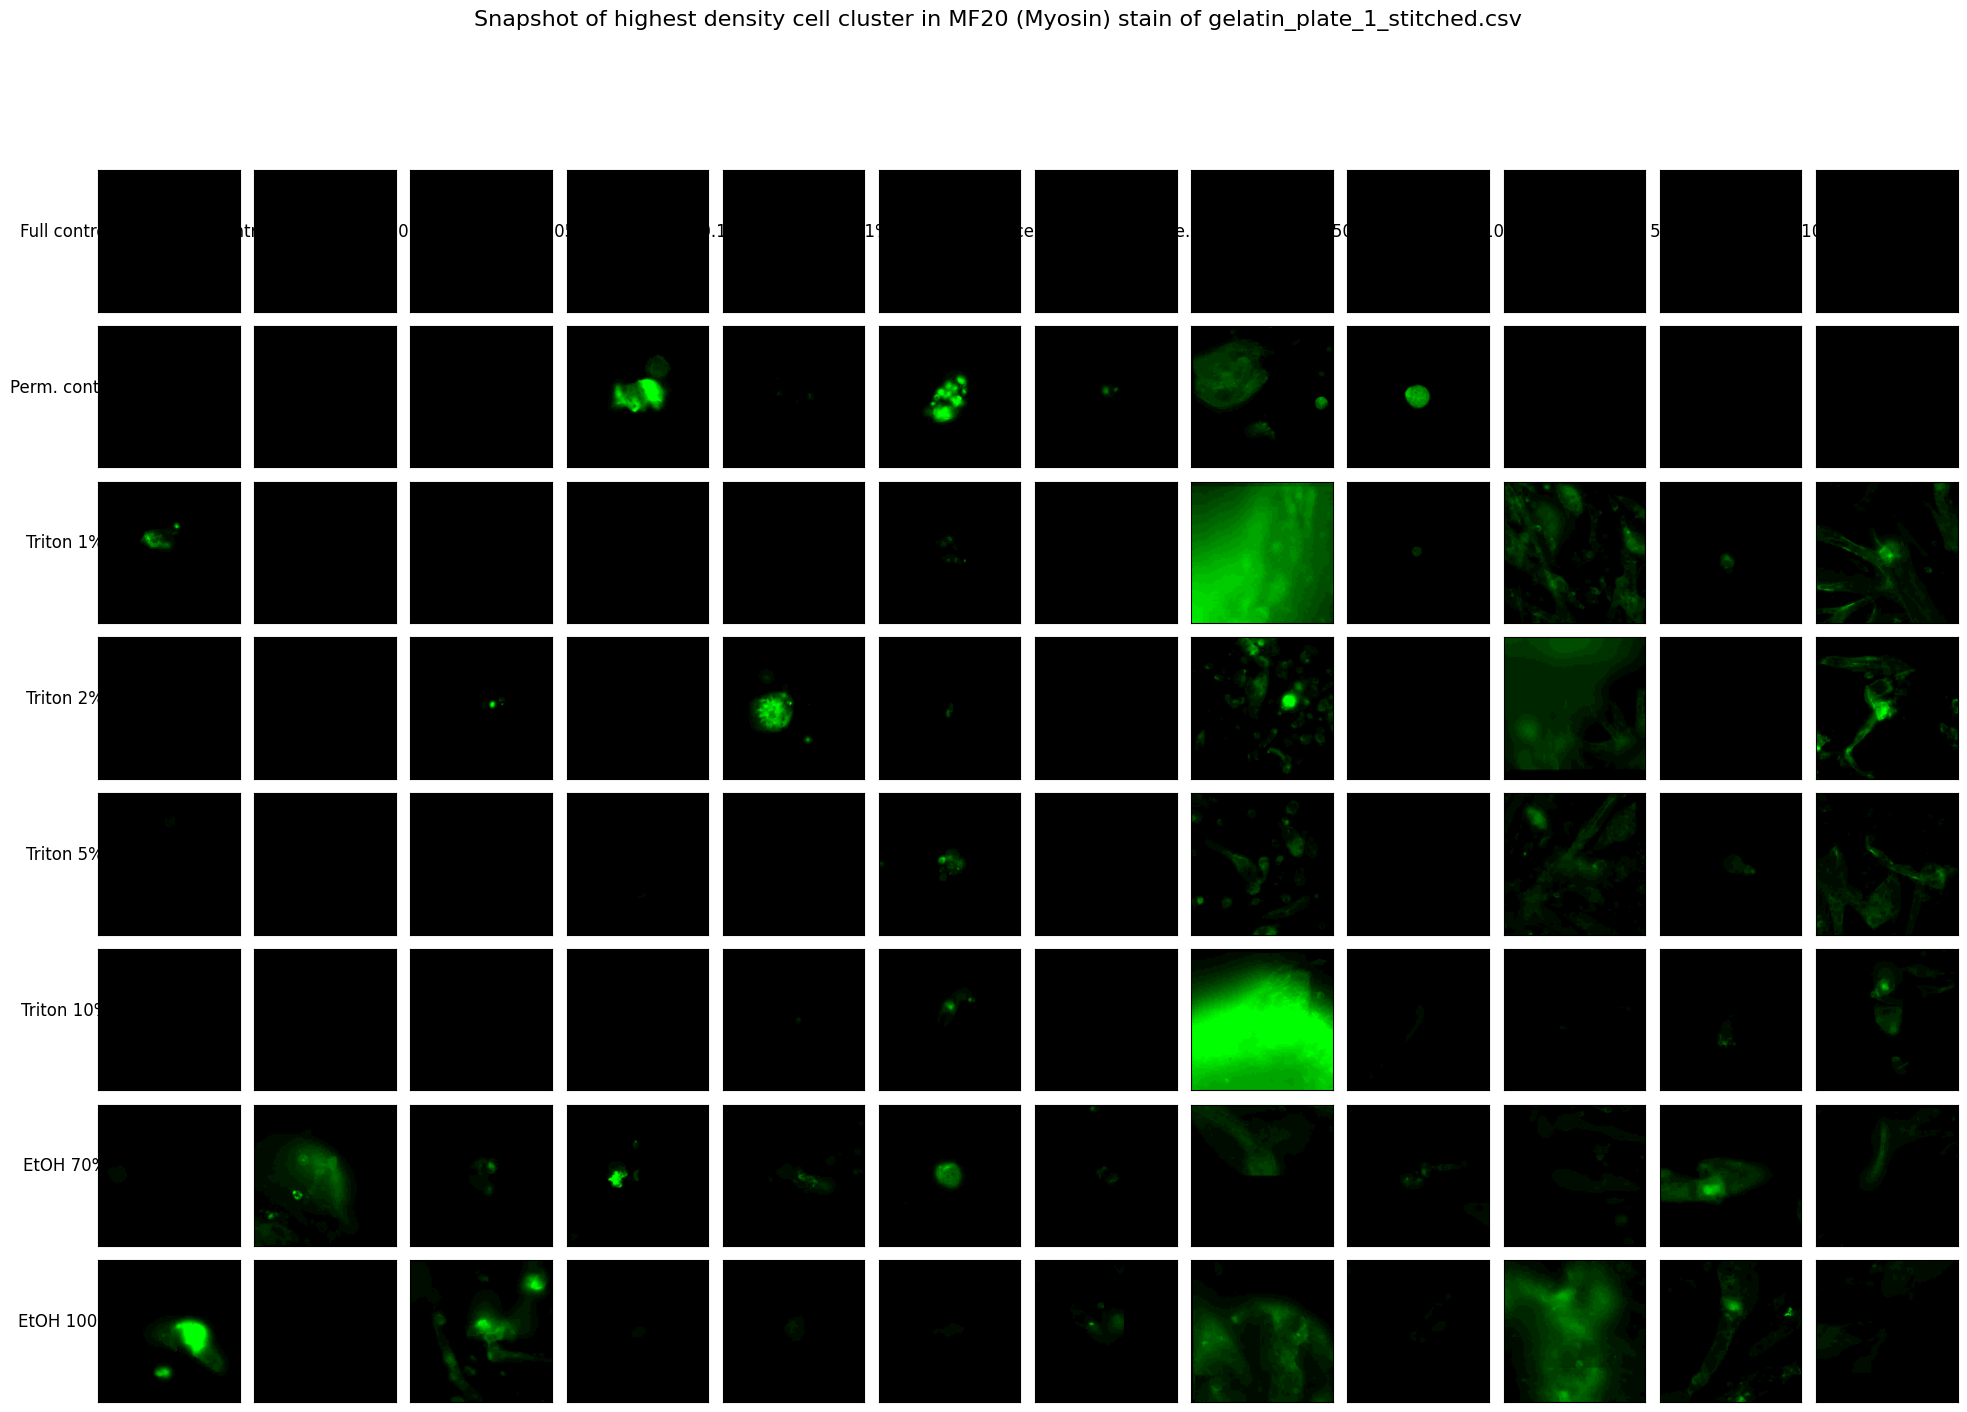

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 1200x800 with 0 Axes>

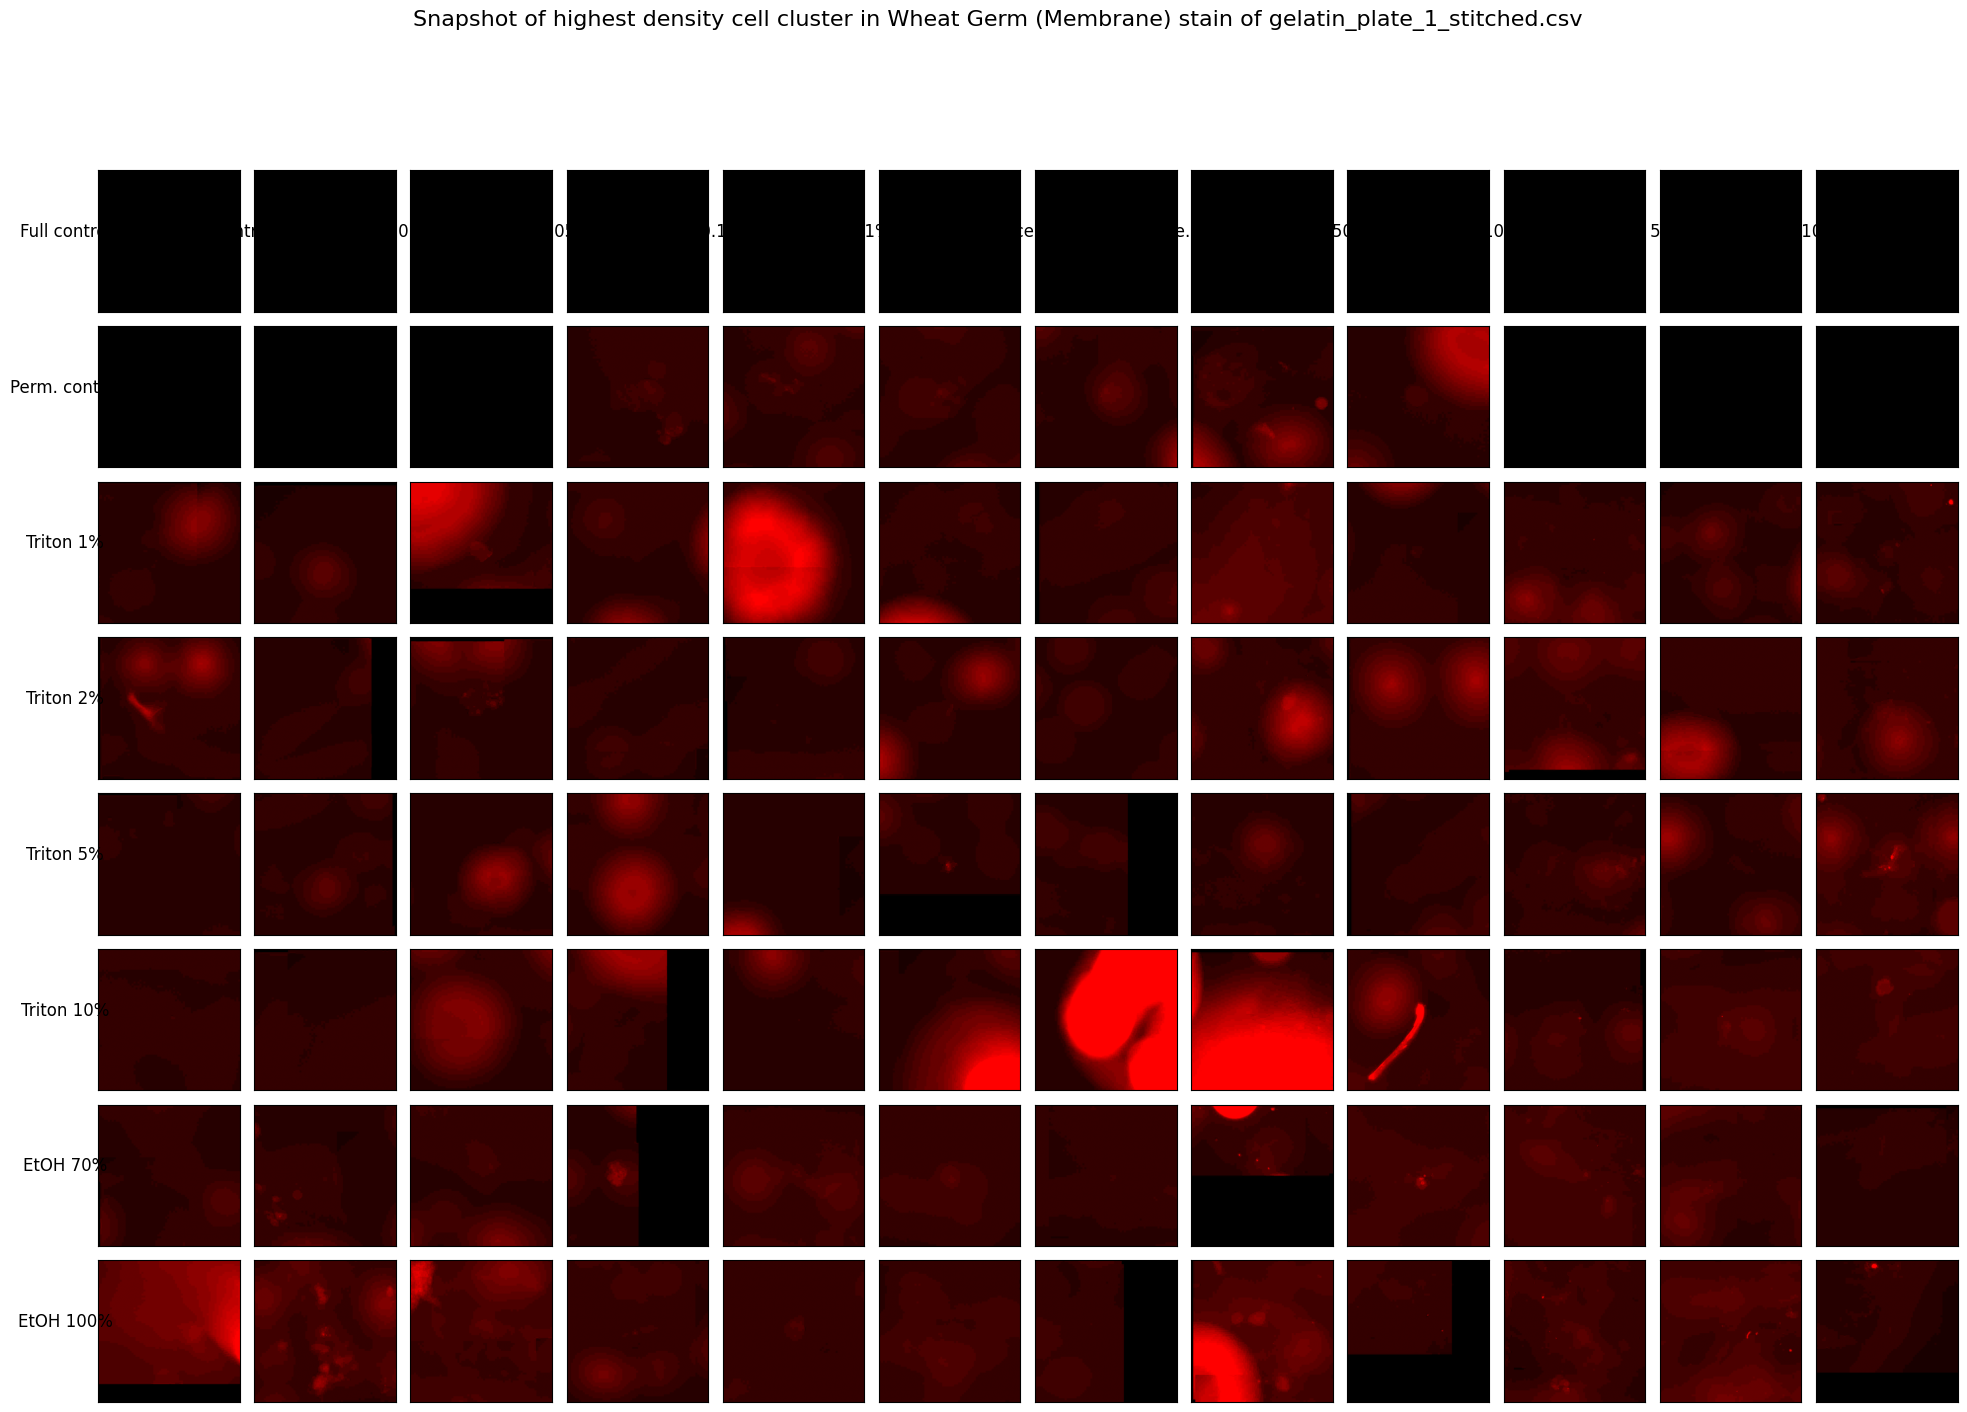

<Figure size 1200x800 with 0 Axes>

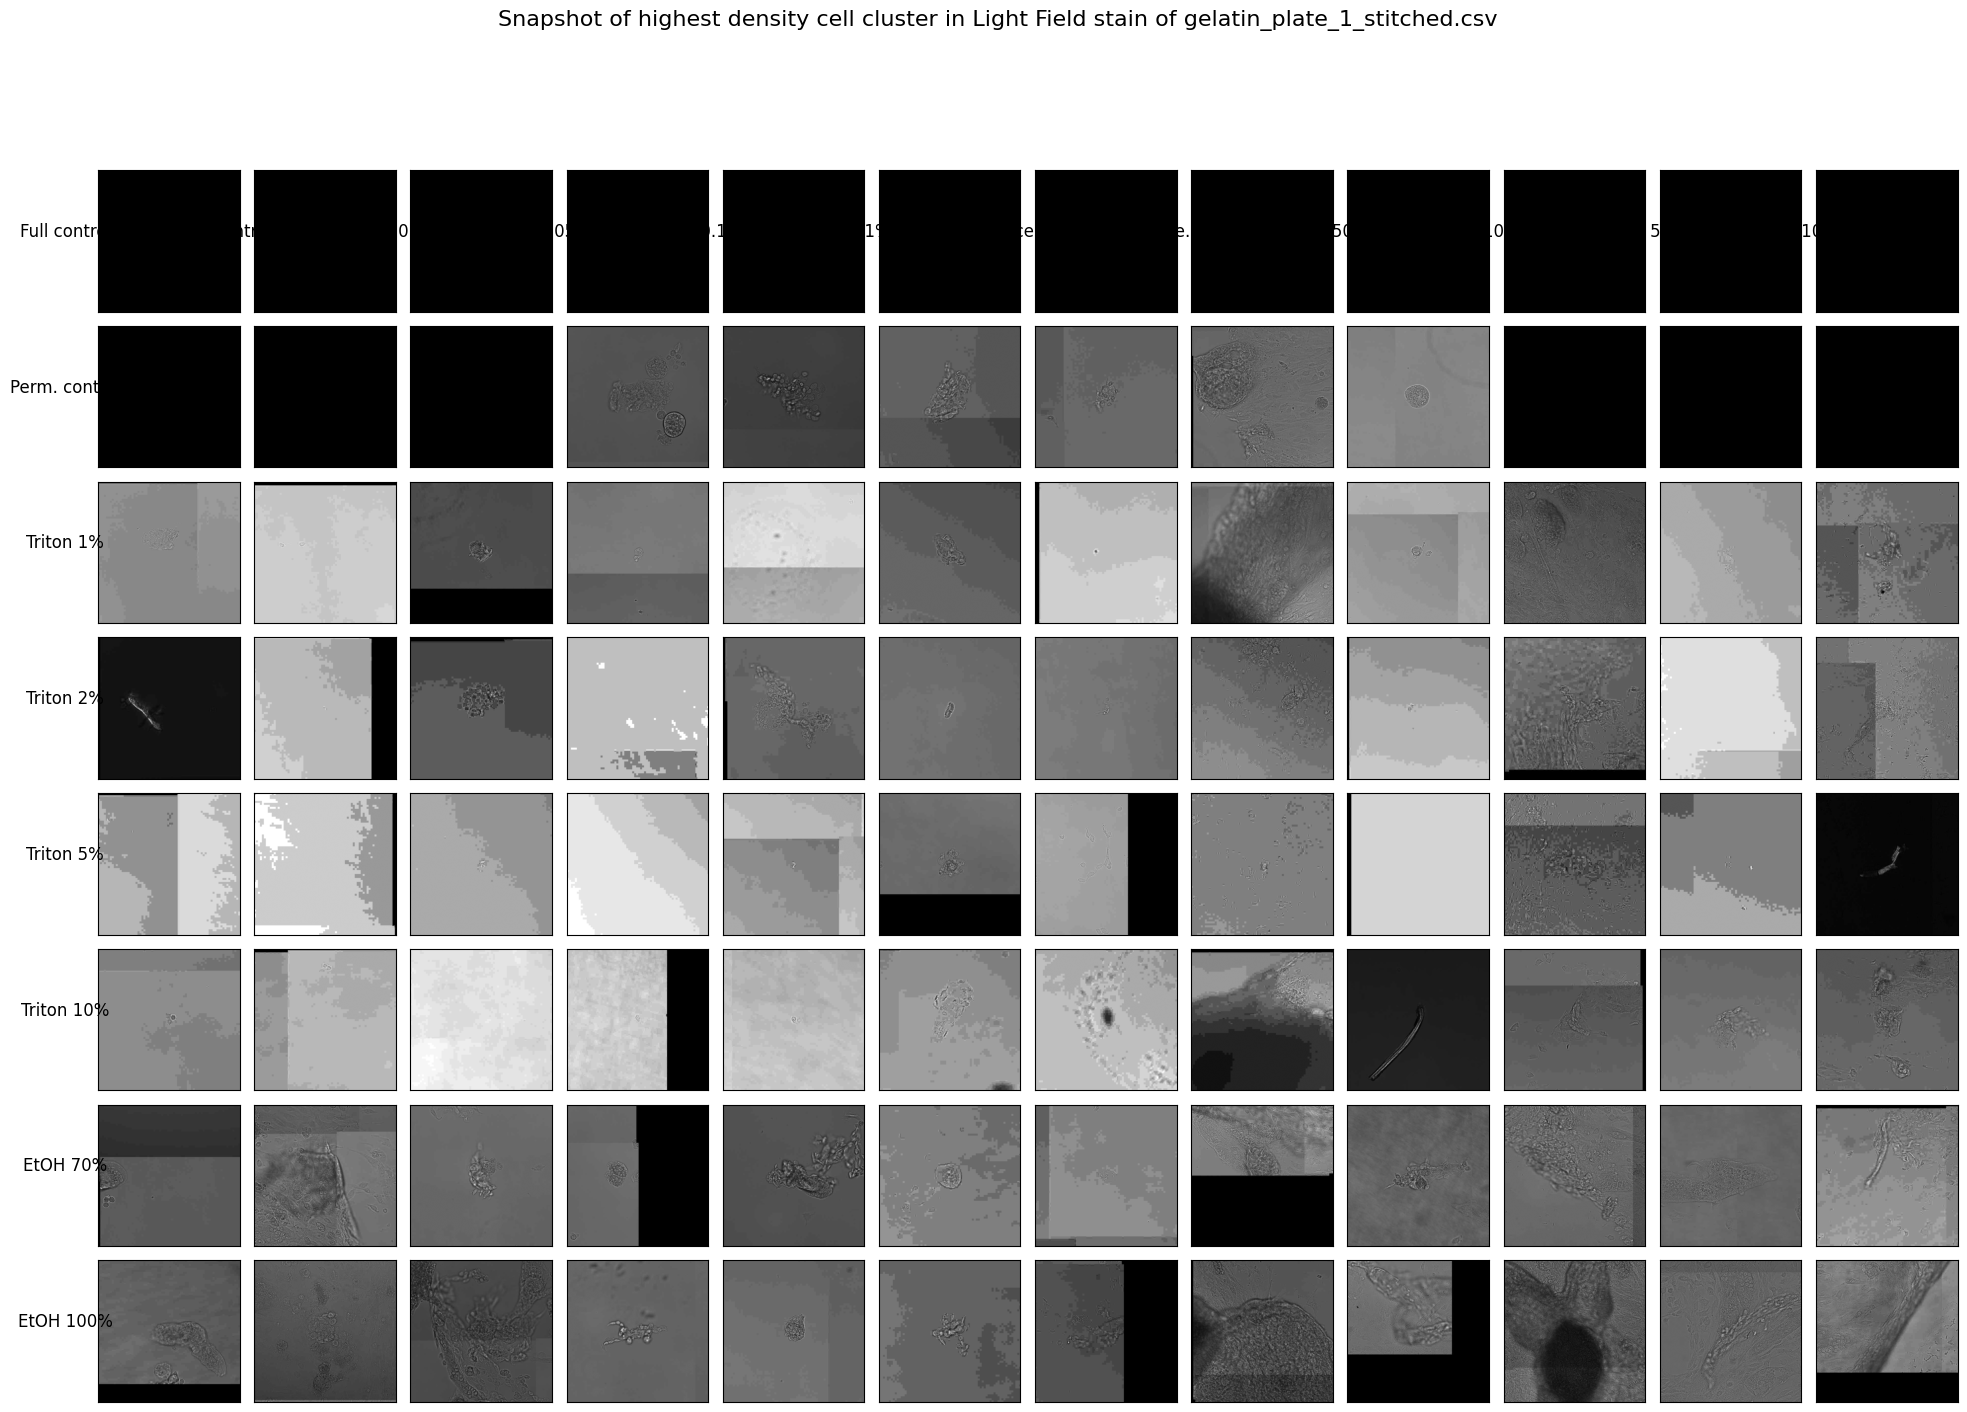

In [228]:
image_matrix_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
)
image_matrix_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w525", "MF20 (Myosin)", "Greens"),
)
image_matrix_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w597", "Wheat Germ (Membrane)", "Reds"),
)
image_matrix_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w-50", "Light Field", "Greys"),
)


<Figure size 1200x800 with 0 Axes>

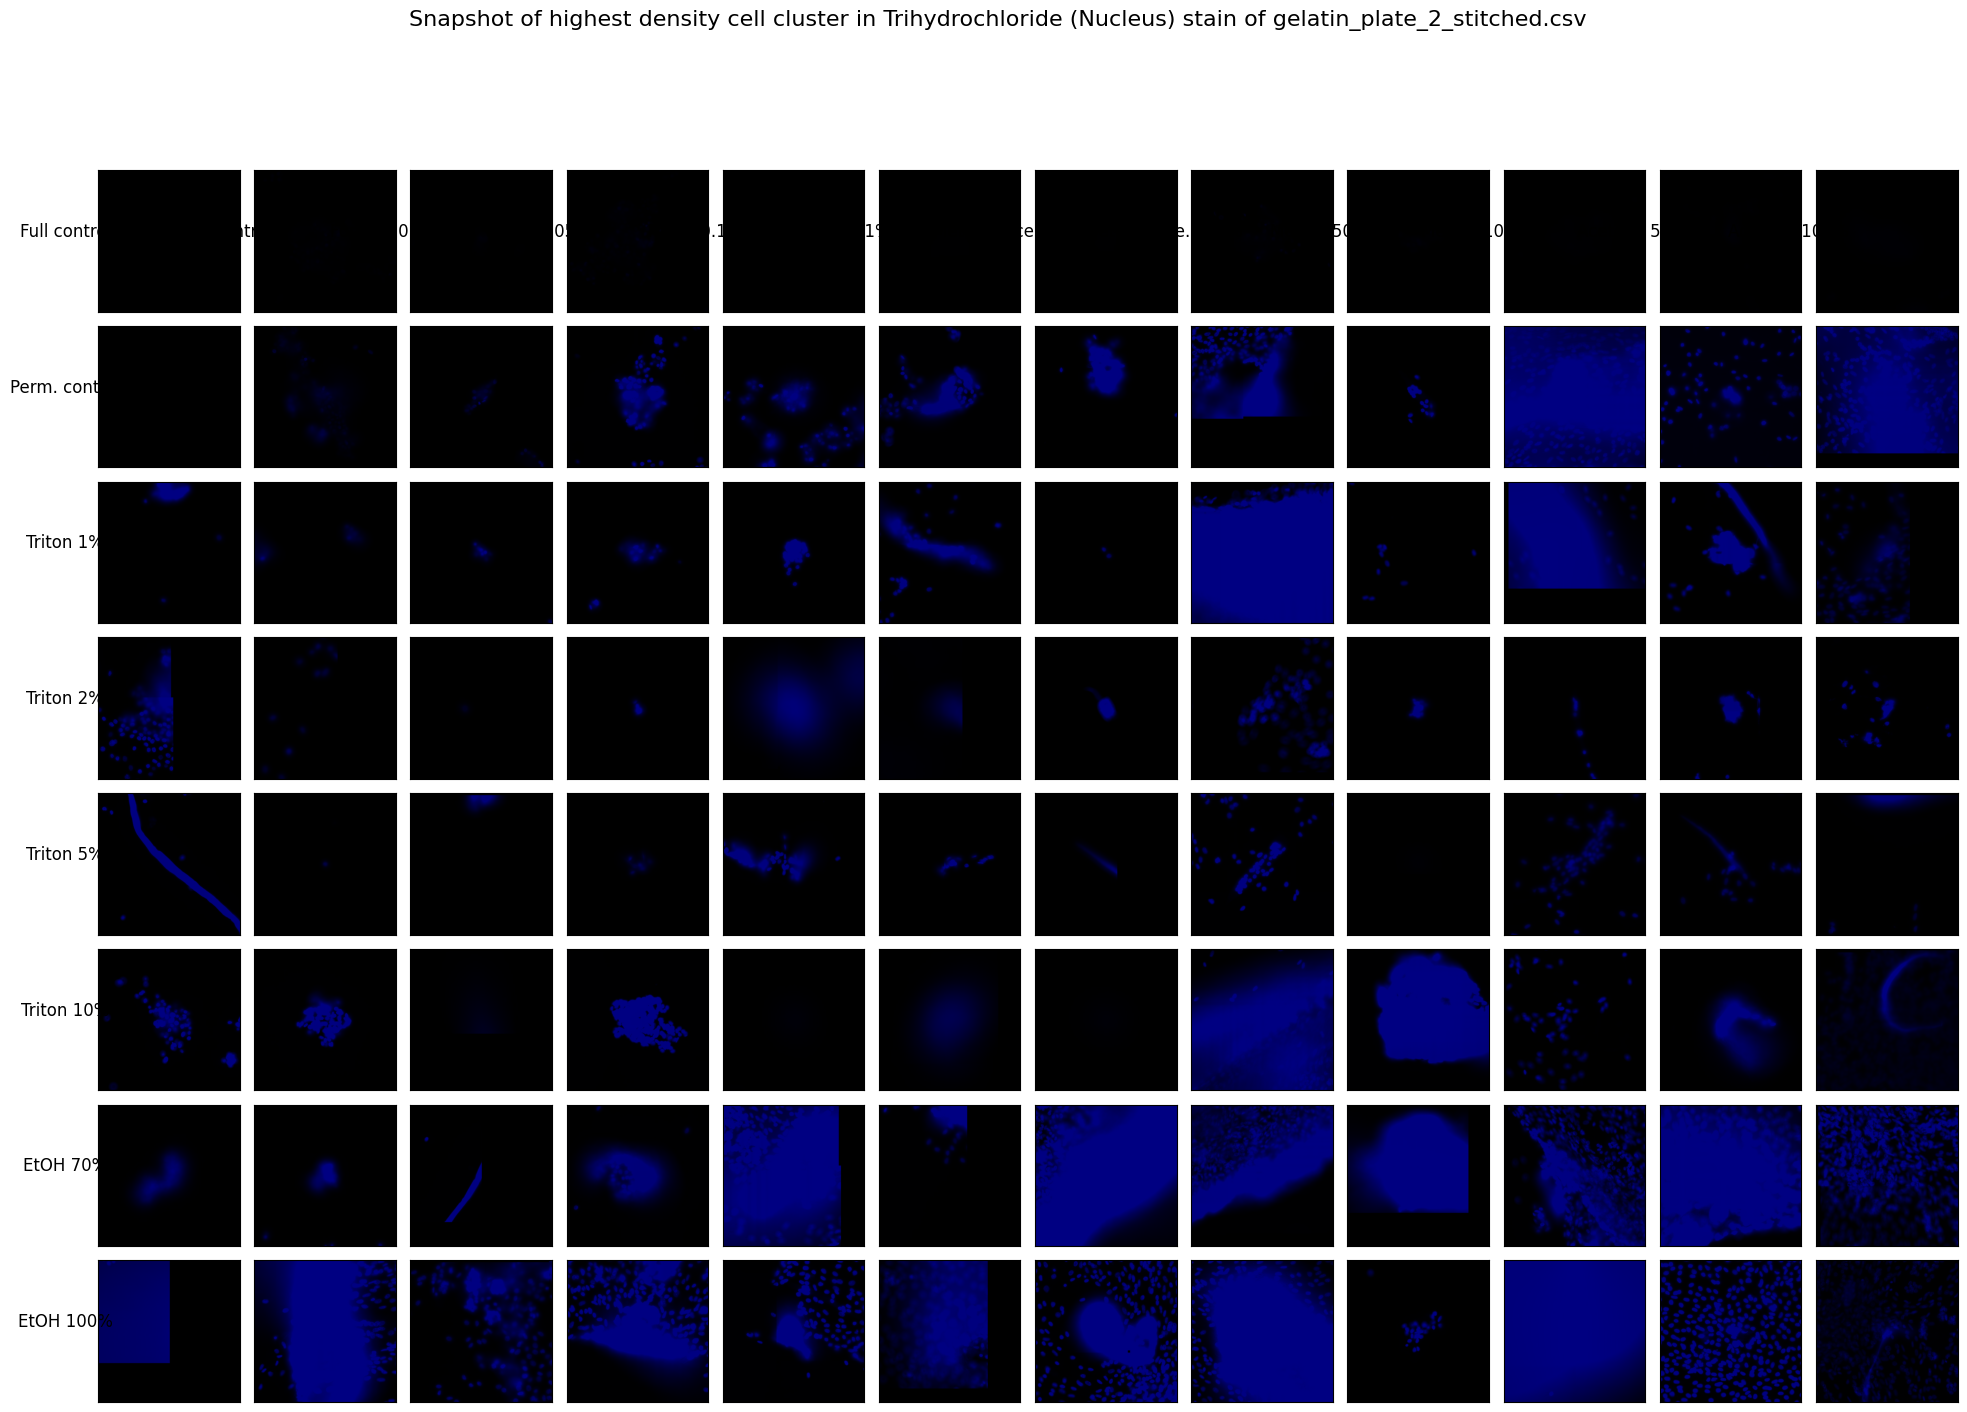

<Figure size 1200x800 with 0 Axes>

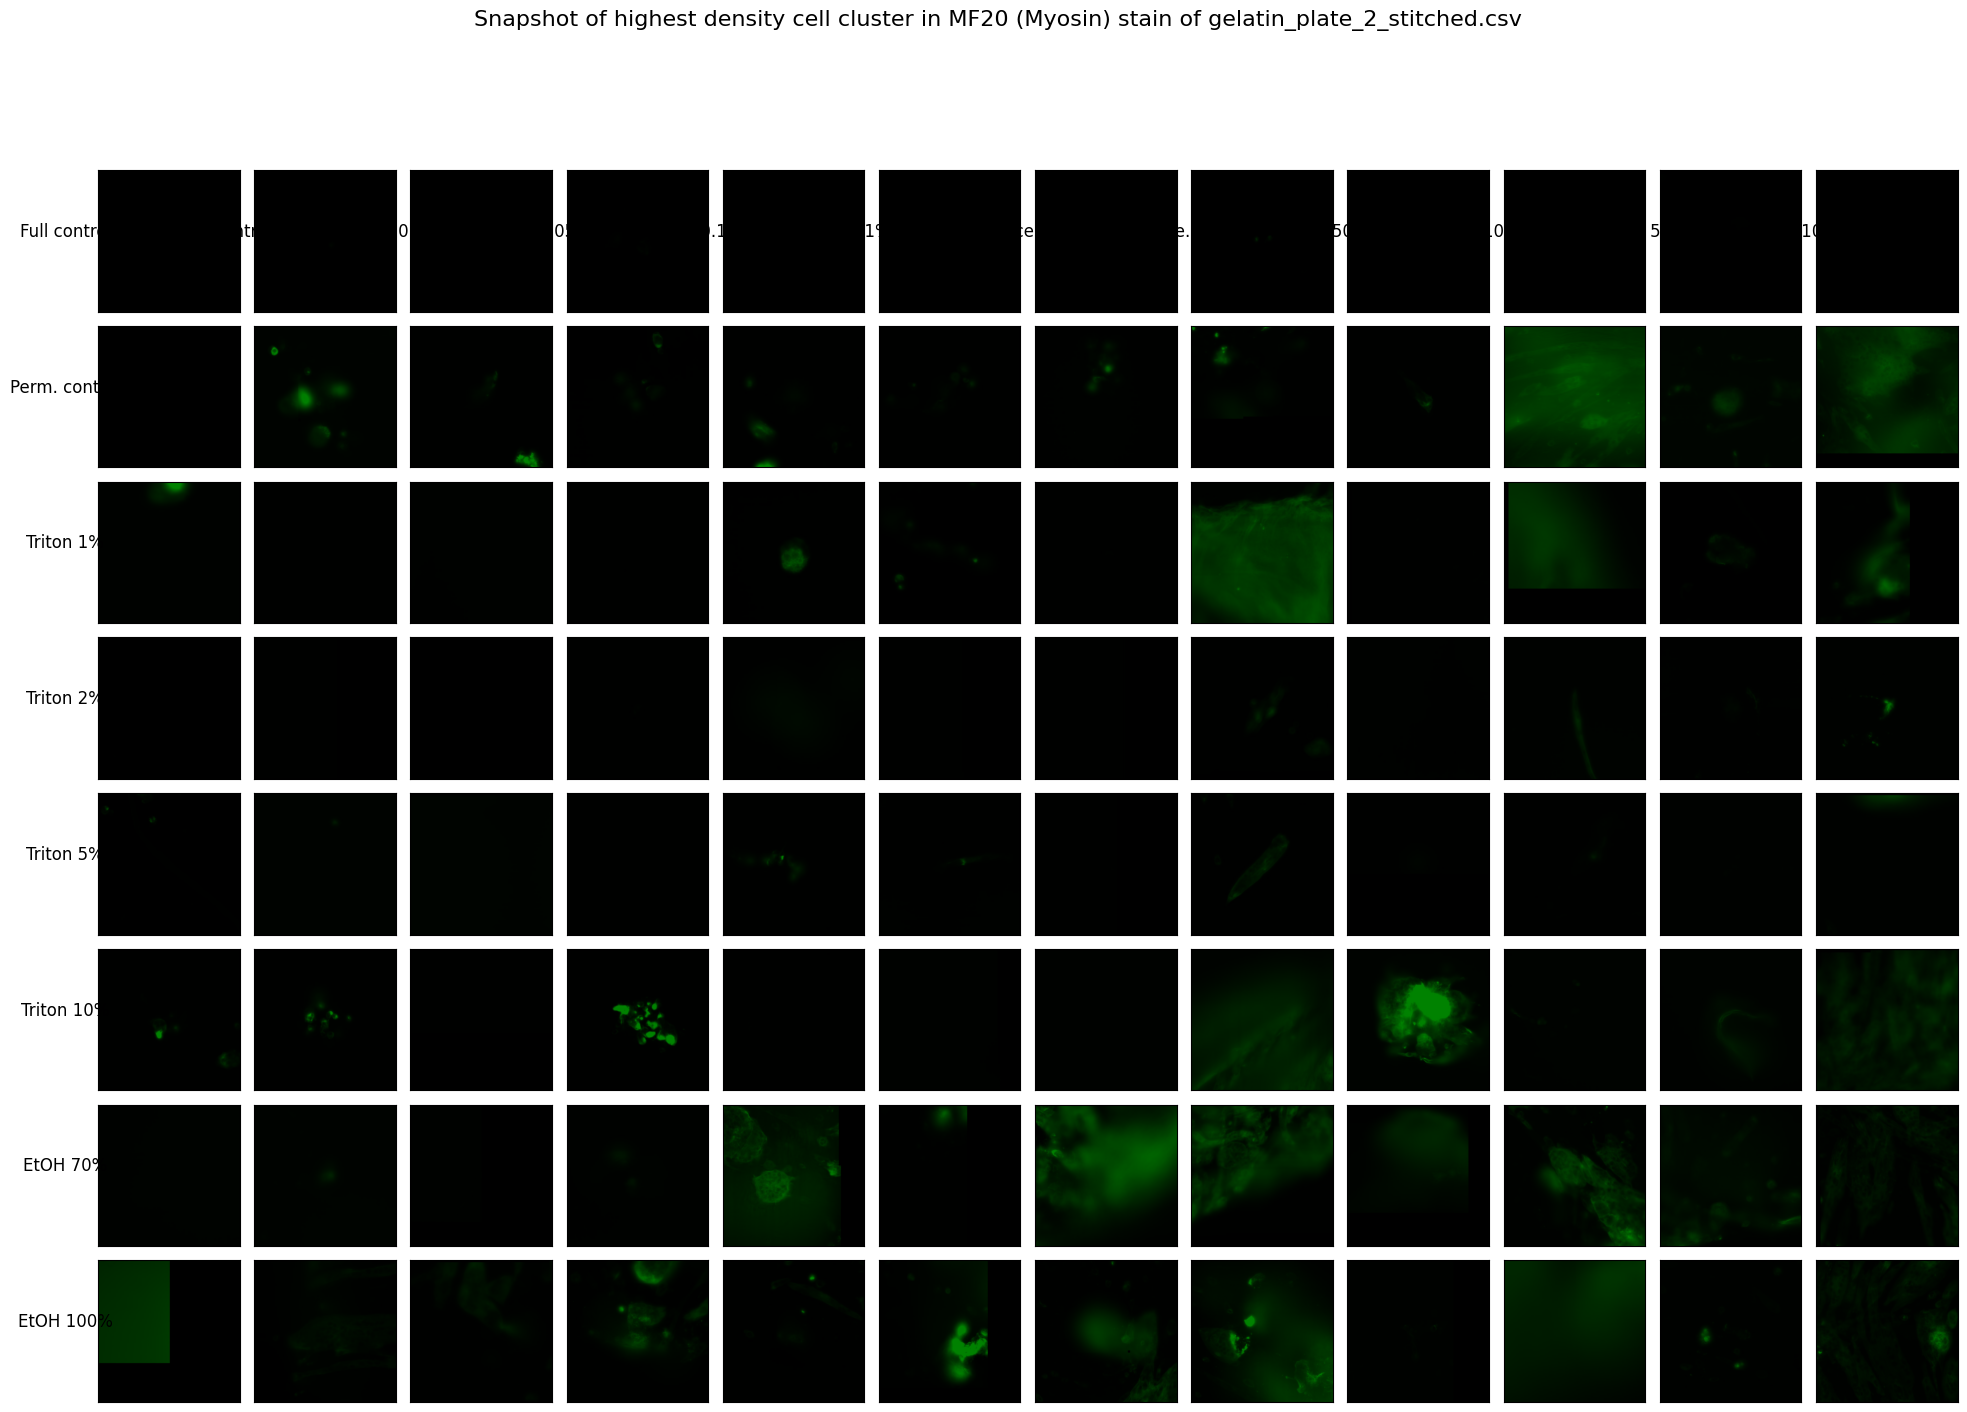

<Figure size 1200x800 with 0 Axes>

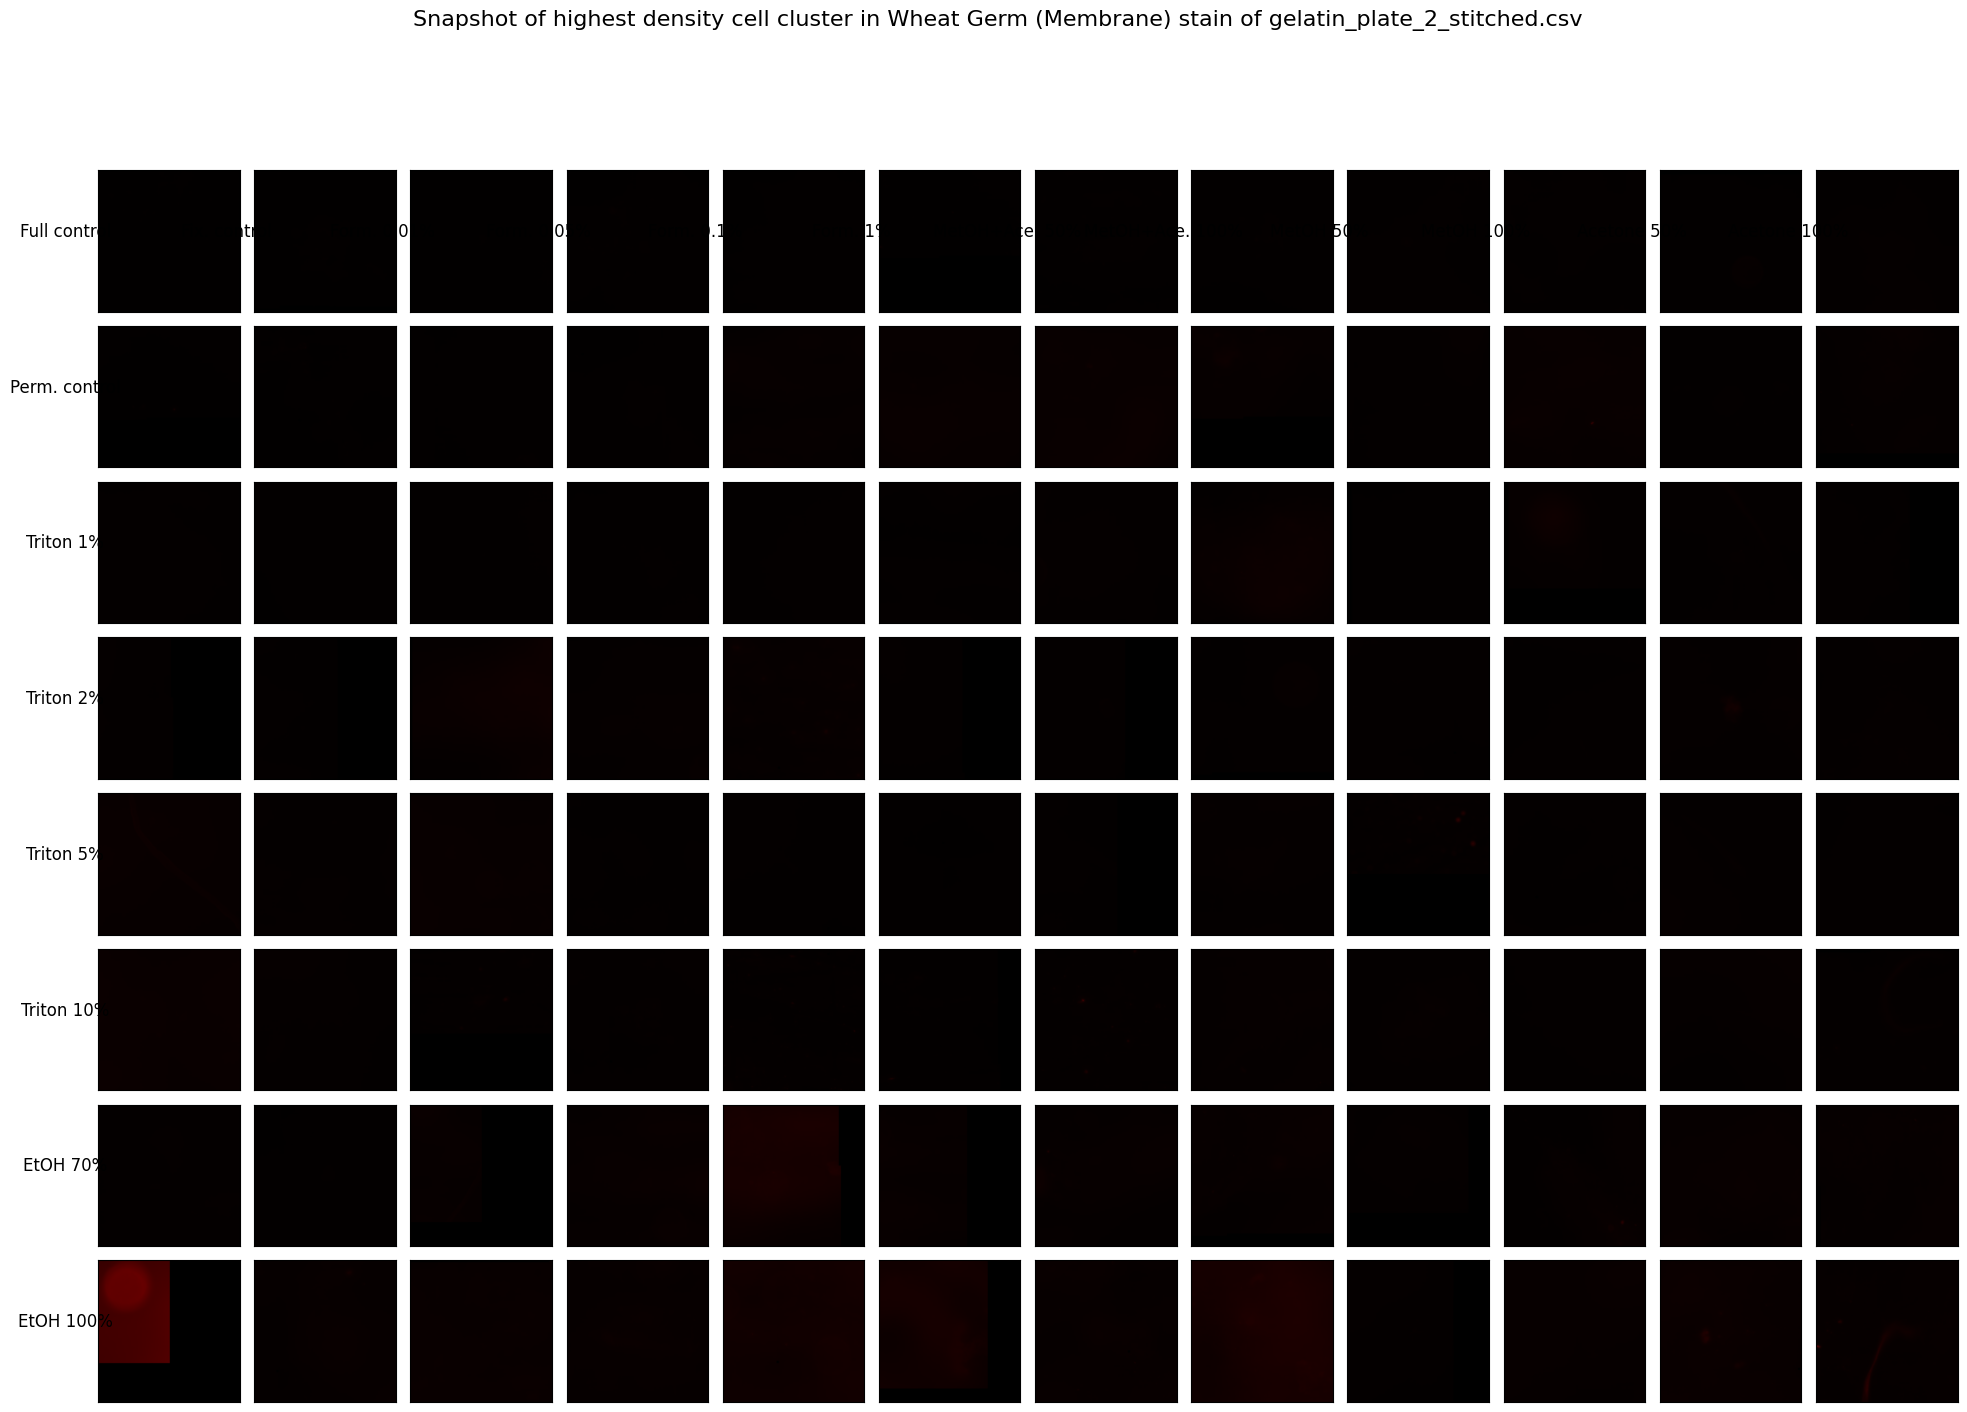

<Figure size 1200x800 with 0 Axes>

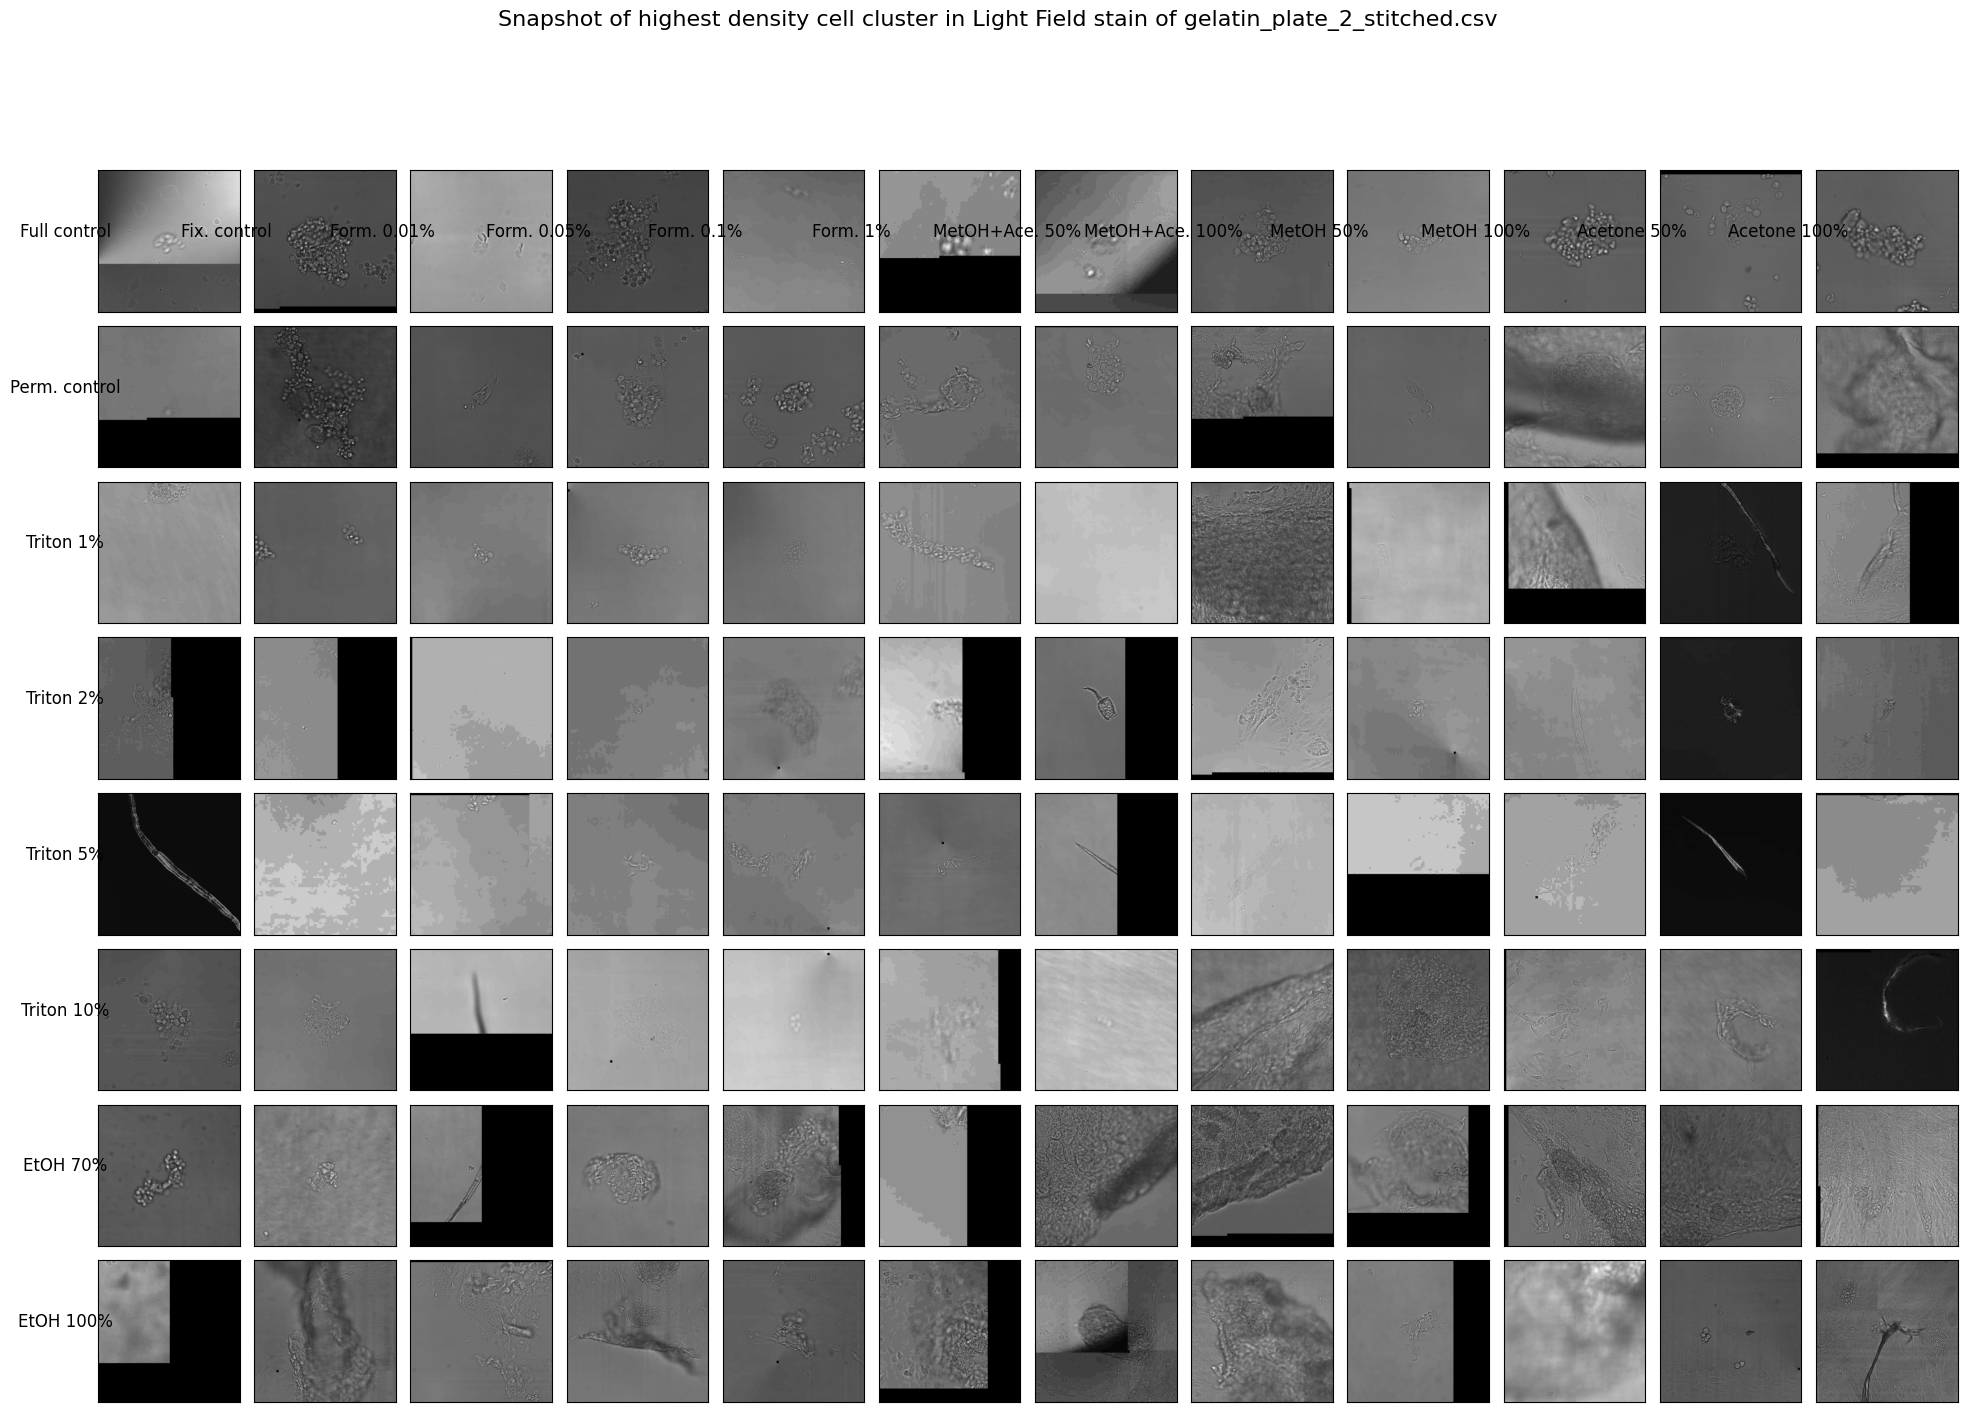

In [237]:
image_matrix_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
    norm_factor=0.002
)
image_matrix_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w525", "MF20 (Myosin)", "Greens"),
    norm_factor=0.002
)
image_matrix_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w597", "Wheat Germ (Membrane)", "Reds"),
    norm_factor=0.002
)
image_matrix_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w-50", "Light Field", "Greys"),
    norm_factor=0.002
)


## Let's download the images generated and save cropped versions around the densest areas & create dataframes of mean, max, min 

In [98]:
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, transform

from skimage.morphology import disk
import pdb
import numpy as np


def find_densest_region(image_data, downsample_factor=10, debug=False):
    downsampled_data = transform.rescale(
        image_data, scale=1 / downsample_factor, anti_aliasing=False
    )

    if debug:
        plt.subplot(221)
        plt.imshow(downsampled_data)
        plt.title("Downsampled image")
        print("next, applying gaussian filter!")

    # Gaussian-filter the image
    filtered_data = filters.gaussian(downsampled_data, sigma=9)
    if debug:
        plt.subplot(222)
        plt.imshow(filtered_data)
        plt.title("Gaussian-filtered image")
        print("next, running morphological close operation!")

    # Perform a morphological close operation
    closed_data = morphology.closing(filtered_data, disk(31))
    if debug:
        plt.subplot(223)
        plt.imshow(closed_data)
        plt.title("Closed image")
        print("next, finding global maxima!")

    # Find the regions where local maxima occur
    # Find the global maximum
    global_max_position = np.unravel_index(np.argmax(closed_data), closed_data.shape)
    if debug:
        plt.subplot(224)
        plt.imshow(closed_data)
        plt.plot(
            global_max_position[1], global_max_position[0], "ro"
        )  # Plot the global maximum in red
        plt.title("Global Maximum Location")
        plt.show()

    return (
        global_max_position[0] * downsample_factor,
        global_max_position[1] * downsample_factor,
    )


def crop_image(
    image_data,
    global_max_position,
    save_file_name=None,
    crop_factor=5,
    downsample_factor=2,
    debug=False,
):
    global_max_position = (
        int(global_max_position[0] / downsample_factor),
        int(global_max_position[1] / downsample_factor),
    )
    image_data = transform.rescale(
        image_data, scale=1 / downsample_factor, anti_aliasing=False
    )

    # Crop around the global_max_position
    crop_size = int(min(image_data.shape) / crop_factor)
    crop_min_row = max(0, global_max_position[0] - crop_size // 2)
    crop_max_row = min(image_data.shape[0], crop_min_row + crop_size)
    crop_min_col = max(0, global_max_position[1] - crop_size // 2)
    crop_max_col = min(image_data.shape[1], crop_min_col + crop_size)

    # Ensure the cropped region has the desired dimensions
    cropped_region = np.zeros((crop_size, crop_size), dtype=image_data.dtype)
    cropped_region[
        : crop_max_row - crop_min_row, : crop_max_col - crop_min_col
    ] = image_data[crop_min_row:crop_max_row, crop_min_col:crop_max_col]
    if debug:
        plt.imshow(cropped_region)
        plt.title("Cropped image")
        plt.show()
    if save_file_name:
        io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))

    return cropped_region

next, applying gaussian filter!
next, running morphological close operation!
next, finding global maxima!


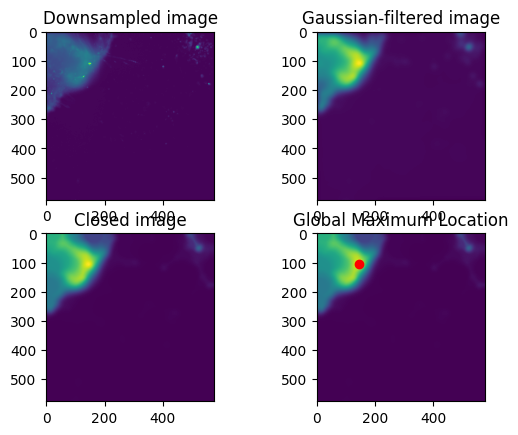

In [99]:
import imageio

image = io.imread('tmp.tiff')
global_max_position = find_densest_region(image, debug=True)

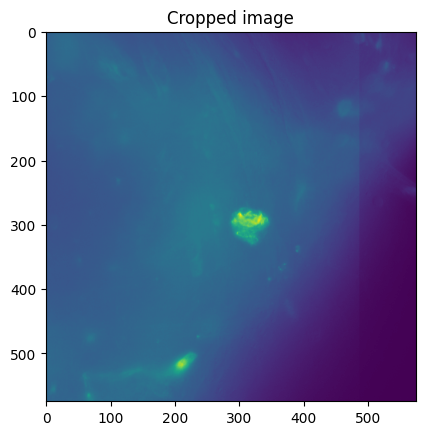

array([[0.05760163, 0.05607042, 0.05740139, ..., 0.02076074, 0.02036936,
        0.02064177],
       [0.0574247 , 0.05817943, 0.05756417, ..., 0.01898508, 0.01989592,
        0.02079407],
       [0.05702908, 0.0585534 , 0.05849201, ..., 0.02013154, 0.02045151,
        0.01912018],
       ...,
       [0.06025805, 0.06136237, 0.06115637, ..., 0.0018188 , 0.00197118,
        0.0018322 ],
       [0.06172999, 0.06064645, 0.06004606, ..., 0.00192344, 0.00192709,
        0.00169812],
       [0.06234949, 0.06223825, 0.06118775, ..., 0.00182213, 0.0018361 ,
        0.00174181]])

In [100]:
crop_image(image, global_max_position, crop_factor=5, debug=True)


In [109]:
import os
import pandas as pd
from smb.SMBConnection import SMBConnection
from skimage import io
import numpy as np
import pdb
import socket
import io as sysio
from tqdm import tqdm


def connect_to_server(server_name, username, password):
    connection = SMBConnection(username, password, "", server_name, is_direct_tcp=True)
    server_ip = socket.gethostbyname(server_name)
    print(" are we connected? ", connection.connect(server_ip, 139))
    bytedata = "hello world".encode()
    print("To double check: ", connection.echo(bytedata, timeout=10))
    return connection


def process_tiff_images(
    remote_folder,
    connection,
    experiment="gelatin_plate_1_stitched",
    path="/Data/YitongTseo/20231107_Fix_Perm_Experiment/",
    rows=["H", "G", "F", "E", "D", "C", "B", "A"],
    columns=[str(idx) for idx in list(range(1, 13))],
    color_channels=["435", "-50", "525", "597"],  # blue, lightfield, green, red
    tmp_file="tmp",
):
    if not os.path.exists(experiment):
        os.mkdir(experiment)
    data = []
    # for file in connection.listPath(remote_folder, os.path.join(path, experiment)):
    #     filename = file.filename
    #     pdb.set_trace()
    #     if filename.endswith(".tiff") or filename.endswith(".tif"):

    for row in tqdm(rows, total=len(rows)):
        for column in columns:
            position = (None, None)  # Set by the DAPI channel
            for color_channel in color_channels:
                try:
                    filename = row + column + "_R3D_STC_w" + color_channel + ".tif"
                    print(filename)
                    remote_path = os.path.join(path, experiment, filename)
                    with open(tmp_file, "wb") as local_file:
                        connection.retrieveFile(remote_folder, remote_path, local_file)

                    image = io.imread(tmp_file)
                    if color_channel == "435":
                        # set the window of interest based off of blue DAPI stain
                        print("Retrieving densest region of cells baesd on DAPI image!")
                        position = find_densest_region(image, debug=False)
                        print("Done retrieving densest region of cells!")

                    assert position[0] is not None and position[1] is not None
                    reduced_filename = os.path.join(
                        experiment, filename[:-4] + "_reduced.jpg"
                    )
                    crop_image(image, position, save_file_name=reduced_filename)

                    data.append(
                        {
                            "filename": filename,
                            "reduced_filename": reduced_filename,
                            "pixel_mean": np.mean(image),
                            "pixel_min": np.min(image),
                            "pixel_max": np.max(image),
                        }
                    )
                except:
                    continue
            pd.DataFrame(data).to_csv(experiment + ".csv")
    return pd.DataFrame(data)

In [110]:
server_name = "bmc-lab6.mit.edu" # smb://bmc-lab6.mit.edu/microscopy
username = "yitongt@mit.edu"
password = "Dapangnekos3!!"
remote_folder = "microscopy"  # Adjust this based on your folder structure in the server
path = "/Data/YitongTseo/20231107_Fix_Perm_Experiment/gelatin_plate_1_stitched/"

connection = connect_to_server(server_name, username, password)
result_df = process_tiff_images(remote_folder, connection, experiment="gelatin_plate_1_stitched")
result_df = process_tiff_images(remote_folder, connection, experiment="gelatin_plate_2_stitched")

# Now 'result_df' contains the computed features for each TIFF image
print(result_df)

connection.close()


 are we connected?  True
To double check:  b'hello world'


  0%|          | 0/8 [00:00<?, ?it/s]

H1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H1_R3D_STC_w-50.tif
H1_R3D_STC_w525.tif
H1_R3D_STC_w597.tif
H2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H2_R3D_STC_w-50.tif
H2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H3_R3D_STC_w-50.tif
H3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H4_R3D_STC_w-50.tif
H4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H8_R3D_STC_w-50.tif
H8_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H8_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H8_R3D_STC_w597.tif
H9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H9_R3D_STC_w-50.tif
H9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H10_R3D_STC_w-50.tif
H10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H11_R3D_STC_w-50.tif
H11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H12_R3D_STC_w-50.tif
H12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/H12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 12%|█▎        | 1/8 [11:49<1:22:47, 709.71s/it]

G1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G1_R3D_STC_w-50.tif
G1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G2_R3D_STC_w-50.tif
G2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G3_R3D_STC_w-50.tif
G3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G4_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G4_R3D_STC_w-50.tif
G4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G5_R3D_STC_w-50.tif
G5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G8_R3D_STC_w-50.tif
G8_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G8_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G8_R3D_STC_w597.tif
G9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G9_R3D_STC_w-50.tif
G9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G10_R3D_STC_w-50.tif
G10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G11_R3D_STC_w-50.tif
G11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G12_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/G12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 25%|██▌       | 2/8 [23:12<1:09:24, 694.09s/it]

F1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F1_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F1_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F1_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F2_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F2_R3D_STC_w-50.tif
F2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F3_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F3_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F3_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F4_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F4_R3D_STC_w-50.tif
F4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F5_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F6_R3D_STC_w597.tif
F7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F7_R3D_STC_w597.tif
F8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F8_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F8_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F8_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F8_R3D_STC_w525.tif
F8_R3D_STC_w597.tif
F9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F9_R3D_STC_w-50.tif
F9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F9_R3D_STC_w597.tif
F10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F10_R3D_STC_w-50.tif
F10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F11_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F11_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F12_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/F12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 38%|███▊      | 3/8 [38:02<1:05:16, 783.31s/it]

E1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E1_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E1_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E1_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E2_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E2_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E2_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E3_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E3_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E3_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E4_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E4_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E4_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E5_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E6_R3D_STC_w-50.tif
E6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E7_R3D_STC_w-50.tif
E7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E8_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E8_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E8_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E8_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E8_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E8_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E9_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E9_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E9_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E10_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E10_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E11_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E11_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E11_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E12_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/E12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 50%|█████     | 4/8 [1:13:49<1:28:06, 1321.59s/it]

D1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D1_R3D_STC_w-50.tif
D1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D2_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D2_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D2_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D3_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D3_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D3_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D4_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D4_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D4_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D5_R3D_STC_w-50.tif
D5_R3D_STC_w525.tif
D5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D6_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D8_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D8_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D8_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D8_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D8_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D8_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D9_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D9_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D9_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D10_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D10_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D11_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D11_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D11_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/D12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 62%|██████▎   | 5/8 [3:15:47<2:54:11, 3484.00s/it]

C1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C1_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C1_R3D_STC_w-50.tif
C1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C2_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C2_R3D_STC_w-50.tif
C2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C3_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C3_R3D_STC_w-50.tif
C3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C3_R3D_STC_w597.tif
C4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C4_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C4_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C4_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C5_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C5_R3D_STC_w597.tif
C6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C7_R3D_STC_w-50.tif
C7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C8_R3D_STC_w-50.tif
C8_R3D_STC_w525.tif
C8_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C8_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C9_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C9_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C9_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C10_R3D_STC_w-50.tif
C10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C11_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C11_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C11_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/C12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 75%|███████▌  | 6/8 [3:43:20<1:35:23, 2861.60s/it]

B1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B1_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B1_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B1_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B2_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B2_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B2_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B3_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B3_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B3_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B4_R3D_STC_w-50.tif
B4_R3D_STC_w525.tif
B4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B5_R3D_STC_w-50.tif
B5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B6_R3D_STC_w525.tif
B6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B8_R3D_STC_w-50.tif
B8_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B8_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B8_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B8_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B9_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B9_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B10_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B10_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B10_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B11_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B11_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B11_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B12_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/B12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 88%|████████▊ | 7/8 [3:57:52<36:51, 2211.07s/it]  

A1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A1_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A1_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A1_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A2_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A2_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A2_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A3_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A3_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A3_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A4_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A4_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A4_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A5_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A6_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A8_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A8_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A8_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A8_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A8_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A8_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A8_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A9_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A9_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A9_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A10_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A10_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A10_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A11_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A11_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A11_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A12_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_1_stitched/A12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
  0%|          | 0/8 [00:00<?, ?it/s]

H1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H1_R3D_STC_w-50.tif
H1_R3D_STC_w525.tif
H1_R3D_STC_w597.tif
H2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H2_R3D_STC_w-50.tif
H2_R3D_STC_w525.tif
H2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/H2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H3_R3D_STC_w-50.tif
H3_R3D_STC_w525.tif
H3_R3D_STC_w597.tif
H4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H4_R3D_STC_w-50.tif
H4_R3D_STC_w525.tif
H4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/H4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H5_R3D_STC_w-50.tif
H5_R3D_STC_w525.tif
H5_R3D_STC_w597.tif
H6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H6_R3D_STC_w-50.tif
H6_R3D_STC_w525.tif
H6_R3D_STC_w597.tif
H7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H7_R3D_STC_w-50.tif
H7_R3D_STC_w525.tif
H7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/H7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H8_R3D_STC_w-50.tif
H8_R3D_STC_w525.tif
H8_R3D_STC_w597.tif
H9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H9_R3D_STC_w-50.tif
H9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/H9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/H9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H10_R3D_STC_w-50.tif
H10_R3D_STC_w525.tif
H10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/H10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


H11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H11_R3D_STC_w-50.tif
H11_R3D_STC_w525.tif
H11_R3D_STC_w597.tif
H12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
H12_R3D_STC_w-50.tif
H12_R3D_STC_w525.tif
H12_R3D_STC_w597.tif


 12%|█▎        | 1/8 [13:21<1:33:32, 801.85s/it]

G1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G1_R3D_STC_w-50.tif
G1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/G1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/G1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G2_R3D_STC_w-50.tif
G2_R3D_STC_w525.tif
G2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/G2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G3_R3D_STC_w-50.tif
G3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/G3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G3_R3D_STC_w597.tif
G4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G4_R3D_STC_w-50.tif
G4_R3D_STC_w525.tif
G4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/G4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G5_R3D_STC_w-50.tif
G5_R3D_STC_w525.tif
G5_R3D_STC_w597.tif
G6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/G6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G6_R3D_STC_w525.tif
G6_R3D_STC_w597.tif
G7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G7_R3D_STC_w-50.tif
G7_R3D_STC_w525.tif
G7_R3D_STC_w597.tif
G8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G8_R3D_STC_w-50.tif
G8_R3D_STC_w525.tif
G8_R3D_STC_w597.tif
G9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G9_R3D_STC_w-50.tif
G9_R3D_STC_w525.tif
G9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/G9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G10_R3D_STC_w-50.tif
G10_R3D_STC_w525.tif
G10_R3D_STC_w597.tif
G11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G11_R3D_STC_w-50.tif
G11_R3D_STC_w525.tif
G11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/G11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


G12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
G12_R3D_STC_w-50.tif
G12_R3D_STC_w525.tif
G12_R3D_STC_w597.tif


 25%|██▌       | 2/8 [27:01<1:21:13, 812.27s/it]

F1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F1_R3D_STC_w-50.tif
F1_R3D_STC_w525.tif
F1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F2_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F2_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F2_R3D_STC_w525.tif
F2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F3_R3D_STC_w-50.tif
F3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F4_R3D_STC_w-50.tif
F4_R3D_STC_w525.tif
F4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F6_R3D_STC_w-50.tif
F6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F8_R3D_STC_w-50.tif
F8_R3D_STC_w525.tif
F8_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F8_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F9_R3D_STC_w-50.tif
F9_R3D_STC_w525.tif
F9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F10_R3D_STC_w-50.tif
F10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F11_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F11_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F11_R3D_STC_w525.tif
F11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/F11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


F12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
F12_R3D_STC_w-50.tif
F12_R3D_STC_w525.tif
F12_R3D_STC_w597.tif


 38%|███▊      | 3/8 [39:10<1:04:32, 774.41s/it]

E1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E1_R3D_STC_w-50.tif
E1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E2_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E2_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E2_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E3_R3D_STC_w-50.tif
E3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E3_R3D_STC_w597.tif
E4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E4_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E4_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E5_R3D_STC_w525.tif
E5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E6_R3D_STC_w-50.tif
E6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E7_R3D_STC_w-50.tif
E7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E8_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E8_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E8_R3D_STC_w525.tif
E8_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E8_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E9_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E9_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E9_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E9_R3D_STC_w597.tif
E10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E10_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E10_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E11_R3D_STC_w-50.tif
E11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
E12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


E12_R3D_STC_w525.tif
E12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/E12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 50%|█████     | 4/8 [1:01:55<1:07:10, 1007.50s/it]

D1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D1_R3D_STC_w-50.tif
D1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D2_R3D_STC_w-50.tif
D2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D3_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D3_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D3_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D3_R3D_STC_w597.tif
D4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D4_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D4_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D5_R3D_STC_w525.tif
D5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D6_R3D_STC_w-50.tif
D6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D7_R3D_STC_w-50.tif
D7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D8_R3D_STC_w-50.tif
D8_R3D_STC_w525.tif
D8_R3D_STC_w597.tif
D9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D9_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D9_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D10_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D10_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D10_R3D_STC_w525.tif
D10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D11_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D11_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D11_R3D_STC_w597.tif
D12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
D12_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D12_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


D12_R3D_STC_w525.tif
D12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/D12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 62%|██████▎   | 5/8 [1:32:36<1:05:24, 1308.18s/it]

C1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C1_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C1_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C1_R3D_STC_w525.tif
C1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C2_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C2_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C3_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C3_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C4_R3D_STC_w-50.tif
C4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C5_R3D_STC_w-50.tif
C5_R3D_STC_w525.tif
C5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C6_R3D_STC_w525.tif
C6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C8_R3D_STC_w-50.tif
C8_R3D_STC_w525.tif
C8_R3D_STC_w597.tif
C9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C9_R3D_STC_w-50.tif
C9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C10_R3D_STC_w-50.tif
C10_R3D_STC_w525.tif
C10_R3D_STC_w597.tif
C11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C11_R3D_STC_w-50.tif
C11_R3D_STC_w525.tif
C11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


C12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
C12_R3D_STC_w-50.tif
C12_R3D_STC_w525.tif
C12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/C12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
 75%|███████▌  | 6/8 [1:48:24<39:31, 1185.53s/it]  

B1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B1_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B1_R3D_STC_w-50.tif
B1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B2_R3D_STC_w-50.tif
B2_R3D_STC_w525.tif
B2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B3_R3D_STC_w-50.tif
B3_R3D_STC_w525.tif
B3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B4_R3D_STC_w-50.tif
B4_R3D_STC_w525.tif
B4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B5_R3D_STC_w-50.tif
B5_R3D_STC_w525.tif
B5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B6_R3D_STC_w525.tif
B6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B7_R3D_STC_w-50.tif
B7_R3D_STC_w525.tif
B7_R3D_STC_w597.tif
B8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B8_R3D_STC_w-50.tif
B8_R3D_STC_w525.tif
B8_R3D_STC_w597.tif
B9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B9_R3D_STC_w-50.tif
B9_R3D_STC_w525.tif
B9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B10_R3D_STC_w-50.tif
B10_R3D_STC_w525.tif
B10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B11_R3D_STC_w-50.tif
B11_R3D_STC_w525.tif
B11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/B11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


B12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
B12_R3D_STC_w-50.tif
B12_R3D_STC_w525.tif
B12_R3D_STC_w597.tif


 88%|████████▊ | 7/8 [2:01:19<17:31, 1051.40s/it]

A1_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A1_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A1_R3D_STC_w-50.tif
A1_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A1_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A1_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A1_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A2_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A2_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A2_R3D_STC_w-50.tif
A2_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A2_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A2_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A2_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A3_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A3_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A3_R3D_STC_w-50.tif
A3_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A3_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A3_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A3_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A4_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
A4_R3D_STC_w-50.tif
A4_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A4_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A4_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A4_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A5_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A5_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A5_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A5_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A5_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A5_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A5_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A5_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A6_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A6_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A6_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A6_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A6_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A6_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A6_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A6_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A7_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A7_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A7_R3D_STC_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A7_R3D_STC_w-50_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A7_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A7_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A7_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A7_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A8_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A8_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A8_R3D_STC_w-50.tif
A8_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A8_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A8_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A8_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A9_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A9_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A9_R3D_STC_w-50.tif
A9_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A9_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A9_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A9_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A10_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A10_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A10_R3D_STC_w-50.tif
A10_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A10_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A10_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A10_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A11_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A11_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A11_R3D_STC_w-50.tif
A11_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A11_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A11_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A11_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A12_R3D_STC_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A12_R3D_STC_w435_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A12_R3D_STC_w-50.tif
A12_R3D_STC_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A12_R3D_STC_w525_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


A12_R3D_STC_w597.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_5917/1095479476.py:86: UserWarning: gelatin_plate_2_stitched/A12_R3D_STC_w597_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))
100%|██████████| 8/8 [2:13:23<00:00, 1000.39s/it]

                 filename                                   reduced_filename  \
0     H1_R3D_STC_w435.tif  gelatin_plate_2_stitched/H1_R3D_STC_w435_reduc...   
1     H1_R3D_STC_w-50.tif  gelatin_plate_2_stitched/H1_R3D_STC_w-50_reduc...   
2     H1_R3D_STC_w525.tif  gelatin_plate_2_stitched/H1_R3D_STC_w525_reduc...   
3     H1_R3D_STC_w597.tif  gelatin_plate_2_stitched/H1_R3D_STC_w597_reduc...   
4     H2_R3D_STC_w435.tif  gelatin_plate_2_stitched/H2_R3D_STC_w435_reduc...   
..                    ...                                                ...   
379  A11_R3D_STC_w597.tif  gelatin_plate_2_stitched/A11_R3D_STC_w597_redu...   
380  A12_R3D_STC_w435.tif  gelatin_plate_2_stitched/A12_R3D_STC_w435_redu...   
381  A12_R3D_STC_w-50.tif  gelatin_plate_2_stitched/A12_R3D_STC_w-50_redu...   
382  A12_R3D_STC_w525.tif  gelatin_plate_2_stitched/A12_R3D_STC_w525_redu...   
383  A12_R3D_STC_w597.tif  gelatin_plate_2_stitched/A12_R3D_STC_w597_redu...   

       pixel_mean  pixel_min  pixel_max